# Trist'n Joseph - IST 718 - Final Project

## Introduction

Within recent times, consumers have been moving away from brick-and-mortar stores and moving heavily towards eCommerce platforms to fulfil their shopping needs. There are several benefits to shopping on eCommerce platforms: the consumer can shop from a safe and comfortable location; there are no hours of operations, so the consumer can shop at their convenience; there are no lines, so the checkout time is negligible; if an item is out of stock, the consumer can create alerts which notify them when the item is back in stock; and much more.

DEV is a retail technology company that has created ‘DEV Marketplace’; a leading online marketplace in the consumer-packaged goods industry which provides consumers with a confident, safe, and simple shopping experience. Customers can browse products in real-time, compare by price, proximity, or popularity and place orders at local stores for free.

However, maneuvering an eCommerce platform can be challenging. Because all the content is on a website, and it is possible to list thousands of items, product discovery might not be as easy as it could be if a customer were browsing through a physical store. This can cause the customer’s experience to be negative, which can lead to loss of customers/a severe decline in sales/profits.

To combat this issue, DEV proposes using a recommendation system. Recommendation systems have the ability to predict whether a particular user would prefer an item or not, based on that user’s profile. Recommendation systems are beneficial to both the business and the customers because they can reduce the time spent when searching for items. Additionally, strong recommendations can increase customer retention and increase sales.

More specifically, DEV aims to:
- Conduct a basket analysis to understand what products are frequently bought together.
- Segment customers to develop better targeted ads.
- Perform a comparative analysis between the metrics within an established state and the metrics within a new state to gain insight into user-acceptance of the platform.

For this analysis, DEV will use a subset of their proprietary transactions data. 

DEV believes that by examining these key items, they will be able to substantially strengthen DEV Marketplace.

## Packages

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.cluster import KMeans

## Data Manipulation

### Data Loading

In [2]:
# displaying all rows and columns
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

In [3]:
# loading the data
# ca_ data_path = "C:/Users/trist/OneDrive/Desktop/Trist'n/School/Syracuse University/Q3 2021/IST652/Homework/Homework 1/transactions_csv_AprilJune2021.csv"
ny_data_path = "C:/Users/trist/OneDrive/Desktop/Trist'n/School/Syracuse University/Q4 2021/IST718/Project/NYCTransactionsAug2021Nov2021.csv"

# ca_df = pd.read_csv(ca_data_path)
ny_df = pd.read_csv(ny_data_path)

In [4]:
# displaying a sample of NYC data
ny_df.head(10)

,os__id,os__cart_id,os__cart_creation_time,os__product_added_to_cart_time,os__checkout_time,os__checkout_date,os__user_id,os__product_id,os__store_id,os__state,os__special,os__promo_code,os__special_title,os__n_units,os__discounted_checkout_price_per_unit,os__sales,os__jane_country,os__jane_state,p__id,p__product_name,p__product_category,p__sub_category,p__brand_sub_category,p__lineage,p__brand,p__description,p__percent_thc,p__percent_cbd,p__thc_dosage_milligrams,p__cbd_dosage_milligrams,p__created_at,p__updated_at,p__serial_brand,p__product_category_name,p__granular_product
0,149489165,63369340,2021-10-01T00:42:04.490Z,2021-10-01T00:46:22.018Z,2021-10-01T00:50:19.830Z,2021-10-01,3242894,656578.0,67380730.0,New York,\\N,\\N,\\N,1.0,85.0,85.0,USA,New_York,656578.0,Dolce [30pk] (600mg CBD),1.0,Capsules,Capsules,3,Etain,Contains gelatin based and contain MCT Oil\,NaN,NaN,NaN,NaN,NaN,NaN,etain,edible,Dolce [30pk] (600mg CBD)--edible by etain
1,149730094,63464638,2021-10-01T17:55:24.564Z,2021-10-01T17:55:24.604Z,2021-10-01T18:06:59.986Z,2021-10-01,\\N,656578.0,80169624.0,New York,\\N,\\N,\\N,1.0,85.0,85.0,USA,New_York,656578.0,Dolce [30pk] (600mg CBD),1.0,Capsules,Capsules,3,Etain,Contains gelatin based and contain MCT Oil\,NaN,NaN,NaN,NaN,NaN,NaN,etain,edible,Dolce [30pk] (600mg CBD)--edible by etain
2,139994667,59347825,2021-09-02T16:49:25.619Z,2021-09-02T16:52:20.707Z,2021-09-02T16:56:11.866Z,2021-09-02,2392275,656578.0,67380730.0,New York,\\N,\\N,\\N,1.0,85.0,85.0,USA,New_York,656578.0,Dolce [30pk] (600mg CBD),1.0,Capsules,Capsules,3,Etain,Contains gelatin based and contain MCT Oil\,NaN,NaN,NaN,NaN,NaN,NaN,etain,edible,Dolce [30pk] (600mg CBD)--edible by etain
3,158973386,67424580,2021-10-29T15:55:37.445Z,2021-10-29T15:55:37.469Z,2021-10-29T15:56:59.673Z,2021-10-29,\\N,656578.0,51218307.0,New York,\\N,\\N,\\N,1.0,85.0,85.0,USA,New_York,656578.0,Dolce [30pk] (600mg CBD),1.0,Capsules,Capsules,3,Etain,Contains gelatin based and contain MCT Oil\,NaN,NaN,NaN,NaN,NaN,NaN,etain,edible,Dolce [30pk] (600mg CBD)--edible by etain
4,159112038,67479361,2021-10-29T19:35:50.685Z,2021-10-29T19:35:50.696Z,2021-10-29T19:38:16.328Z,2021-10-29,\\N,656578.0,80169624.0,New York,\\N,\\N,\\N,1.0,85.0,85.0,USA,New_York,656578.0,Dolce [30pk] (600mg CBD),1.0,Capsules,Capsules,3,Etain,Contains gelatin based and contain MCT Oil\,NaN,NaN,NaN,NaN,NaN,NaN,etain,edible,Dolce [30pk] (600mg CBD)--edible by etain
5,138110436,58543217,2021-08-27T18:35:38.062Z,2021-08-27T18:36:34.590Z,2021-08-27T18:37:30.893Z,2021-08-27,389470,656578.0,51218307.0,New York,Compassionate Discount,\\N,Compassionate Discount,1.0,76.5,76.5,USA,New_York,656578.0,Dolce [30pk] (600mg CBD),1.0,Capsules,Capsules,3,Etain,Contains gelatin based and contain MCT Oil\,NaN,NaN,NaN,NaN,NaN,NaN,etain,edible,Dolce [30pk] (600mg CBD)--edible by etain
6,147417173,62482207,2021-09-24T17:46:46.628Z,2021-09-24T17:47:06.090Z,2021-09-24T17:49:03.012Z,2021-09-24,389470,656578.0,51218307.0,New York,Compassionate Discount,\\N,Compassionate Discount,2.0,76.5,153.0,USA,New_York,656578.0,Dolce [30pk] (600mg CBD),1.0,Capsules,Capsules,3,Etain,Contains gelatin based and contain MCT Oil\,NaN,NaN,NaN,NaN,NaN,NaN,etain,edible,Dolce [30pk] (600mg CBD)--edible by etain
7,139562616,59168142,2021-09-01T13:10:19.476Z,2021-09-01T13:10:19.486Z,2021-09-01T13:12:06.259Z,2021-09-01,3339024,656578.0,80169624.0,New York,\\N,\\N,\\N,6.0,85.0,510.0,USA,New_York,656578.0,Dolce [30pk] (600mg CBD),1.0,Capsules,Capsules,3,Etain,Contains gelatin based and contain MCT Oil\,NaN,NaN,NaN,NaN,NaN,NaN,etain,edible,Dolce [30pk] (600mg CBD)--edible by etain
8,139680929,59215512,2021-09-01T18:00:11.673Z,2021-09-01T18:08:34.491Z,2021-09-01T18:10:50.811Z,2021-09-01,2392275,656578.0,67380730.0,New York,\\N,\\N,\\N,1.0,85.0,85.0,USA,New_York,656578.0,Dolce [30pk] (600mg CBD),1.0,Capsules,Capsules,3,Etain,Contains gelatin based and contain MCT Oil\,NaN,NaN,NaN,NaN,NaN,NaN,etain,edible,Dolce [30pk] (600mg CBD)--edible by etain
9,139583240,59176320,202

### Data Cleaning

Various data cleaning steps were necessary to appropriately format the the data for analysis. This included converting `id` columns from numbers to strings, converting relevant date columns from strings to date types, and removing incomprehensible values from `id` columns (such as `os__cart_id` = '\\\N')

In [5]:
# Converting the columns to the appropriate types 
ny_df['os__id'] = ny_df['os__id'].astype('string')
ny_df['os__cart_id'] = ny_df['os__cart_id'].astype('string')
ny_df['os__store_id'] = ny_df['os__store_id'].astype('string')
ny_df['os__user_id'] = ny_df['os__user_id'].astype('string')
ny_df['os__product_id'] = ny_df['os__product_id'].astype('string')
ny_df['p__id'] = ny_df['p__id'].astype('string')
ny_df['os__checkout_date'] = ny_df['os__checkout_date'].astype('datetime64[ns]')

In [6]:
# remvoing rows where relevant ids contain 'N'
ny_df = ny_df[~(ny_df['os__user_id'].str.contains('N'))]
ny_df = ny_df[~(ny_df['os__cart_id'].str.contains('N'))]
ny_df = ny_df[~(ny_df['os__store_id'].str.contains('N'))]

In [7]:
ny_df.head(10)

,os__id,os__cart_id,os__cart_creation_time,os__product_added_to_cart_time,os__checkout_time,os__checkout_date,os__user_id,os__product_id,os__store_id,os__state,os__special,os__promo_code,os__special_title,os__n_units,os__discounted_checkout_price_per_unit,os__sales,os__jane_country,os__jane_state,p__id,p__product_name,p__product_category,p__sub_category,p__brand_sub_category,p__lineage,p__brand,p__description,p__percent_thc,p__percent_cbd,p__thc_dosage_milligrams,p__cbd_dosage_milligrams,p__created_at,p__updated_at,p__serial_brand,p__product_category_name,p__granular_product
0,149489165,63369340,2021-10-01T00:42:04.490Z,2021-10-01T00:46:22.018Z,2021-10-01T00:50:19.830Z,2021-10-01,3242894,656578.0,67380730.0,New York,\\N,\\N,\\N,1.0,85.0,85.0,USA,New_York,656578.0,Dolce [30pk] (600mg CBD),1.0,Capsules,Capsules,3,Etain,Contains gelatin based and contain MCT Oil\,NaN,NaN,NaN,NaN,NaN,NaN,etain,edible,Dolce [30pk] (600mg CBD)--edible by etain
2,139994667,59347825,2021-09-02T16:49:25.619Z,2021-09-02T16:52:20.707Z,2021-09-02T16:56:11.866Z,2021-09-02,2392275,656578.0,67380730.0,New York,\\N,\\N,\\N,1.0,85.0,85.0,USA,New_York,656578.0,Dolce [30pk] (600mg CBD),1.0,Capsules,Capsules,3,Etain,Contains gelatin based and contain MCT Oil\,NaN,NaN,NaN,NaN,NaN,NaN,etain,edible,Dolce [30pk] (600mg CBD)--edible by etain
5,138110436,58543217,2021-08-27T18:35:38.062Z,2021-08-27T18:36:34.590Z,2021-08-27T18:37:30.893Z,2021-08-27,389470,656578.0,51218307.0,New York,Compassionate Discount,\\N,Compassionate Discount,1.0,76.5,76.5,USA,New_York,656578.0,Dolce [30pk] (600mg CBD),1.0,Capsules,Capsules,3,Etain,Contains gelatin based and contain MCT Oil\,NaN,NaN,NaN,NaN,NaN,NaN,etain,edible,Dolce [30pk] (600mg CBD)--edible by etain
6,147417173,62482207,2021-09-24T17:46:46.628Z,2021-09-24T17:47:06.090Z,2021-09-24T17:49:03.012Z,2021-09-24,389470,656578.0,51218307.0,New York,Compassionate Discount,\\N,Compassionate Discount,2.0,76.5,153.0,USA,New_York,656578.0,Dolce [30pk] (600mg CBD),1.0,Capsules,Capsules,3,Etain,Contains gelatin based and contain MCT Oil\,NaN,NaN,NaN,NaN,NaN,NaN,etain,edible,Dolce [30pk] (600mg CBD)--edible by etain
7,139562616,59168142,2021-09-01T13:10:19.476Z,2021-09-01T13:10:19.486Z,2021-09-01T13:12:06.259Z,2021-09-01,3339024,656578.0,80169624.0,New York,\\N,\\N,\\N,6.0,85.0,510.0,USA,New_York,656578.0,Dolce [30pk] (600mg CBD),1.0,Capsules,Capsules,3,Etain,Contains gelatin based and contain MCT Oil\,NaN,NaN,NaN,NaN,NaN,NaN,etain,edible,Dolce [30pk] (600mg CBD)--edible by etain
8,139680929,59215512,2021-09-01T18:00:11.673Z,2021-09-01T18:08:34.491Z,2021-09-01T18:10:50.811Z,2021-09-01,2392275,656578.0,67380730.0,New York,\\N,\\N,\\N,1.0,85.0,85.0,USA,New_York,656578.0,Dolce [30pk] (600mg CBD),1.0,Capsules,Capsules,3,Etain,Contains gelatin based and contain MCT Oil\,NaN,NaN,NaN,NaN,NaN,NaN,etain,edible,Dolce [30pk] (600mg CBD)--edible by etain
9,139583240,59176320,2021-09-01T14:18:48.507Z,2021-09-01T14:18:48.516Z,2021-09-01T14:24:43.901Z,2021-09-01,3423638,656578.0,8215872.0,New York,\\N,\\N,\\N,2.0,85.0,170.0,USA,New_York,656578.0,Dolce [30pk] (600mg CBD),1.0,Capsules,Capsules,3,Etain,Contains gelatin based and contain MCT Oil\,NaN,NaN,NaN,NaN,NaN,NaN,etain,edible,Dolce [30pk] (600mg CBD)--edible by etain
13,149491895,63371025,2021-10-01T00:55:33.762Z,2021-10-01T00:55:33.775Z,2021-10-01T00:57:27.849Z,2021-10-01,2600512,316348.0,8983187.0,New York,\\N,\\N,\\N,2.0,100.0,200.0,USA,New_York,316348.0,High THC,2.0,Oils,Premium Concentrated Cannabis Oil,\\N,Columbia Care,Premium High THC Concentrated Cannabis Oil\,NaN,NaN,NaN,NaN,NaN,NaN,columbiacare,extract,High THC --extract by columbiacare
14,149554357,63395345,2021-10-01T10:59:52.811Z,2021-10-01T10:59:52.821Z,2021-10-01T11:02:05.262Z,2021-10-01,2228085,316348.0,50362364.0,New York,\\N,\\N,\\N,1.0,100.0,100.0,USA,New_York,316348.0,High THC,2.0,Oils,Premium Concentrated Cannabis Oil,\\N,Columbia Care,Premium High THC Concentrated Cannabis Oil\,NaN,NaN,NaN,NaN,NaN,NaN,columbiacare,extract,High THC -

### Data Transformation

Multiple brands can sell multiple product categories, and consumers will most likely purchase products from brands which fall under multiple product categories. Therefore, it was appropriate for analysis to generate a column specifying which brand and product catgory consumers were consuming. 

In [8]:
# creating `p__brands_product_category`
ny_df['p__brands_product_category'] = ny_df['p__serial_brand'].astype(str) + ' -- ' + ny_df['p__product_category_name'].astype(str)

## Data Analysis

### Exploratory Metrics

#### Daily Sales

In [9]:
ny_daily_metrics = ny_df \
    .groupby('os__checkout_date') \
    .agg(
        total_sales = pd.NamedAgg('os__sales', 'sum'),
        total_units = pd.NamedAgg('os__n_units', 'sum'),
        total_transactions = pd.NamedAgg('os__cart_id', 'nunique'),
        total_customers = pd.NamedAgg('os__user_id', 'nunique'),
    ) \
    .sort_values('os__checkout_date', ascending=False)

ny_daily_metrics.head(10)

,total_sales,total_units,total_transactions,total_customers
os__checkout_date,,,,
2021-11-10,92159.25,1560.0,515,500
2021-11-09,87410.36,1482.0,497,475
2021-11-08,86895.83,1488.0,493,471
2021-11-05,90325.41,1551.0,542,525
2021-11-04,75743.87,1280.0,434,425
2021-11-03,76386.21,1271.0,428,416
2021-11-02,92222.16,1577.0,512,492
2021-11-01,87878.16,1470.0,542,514
2021-10-31,105425.32,1694.0,523,504


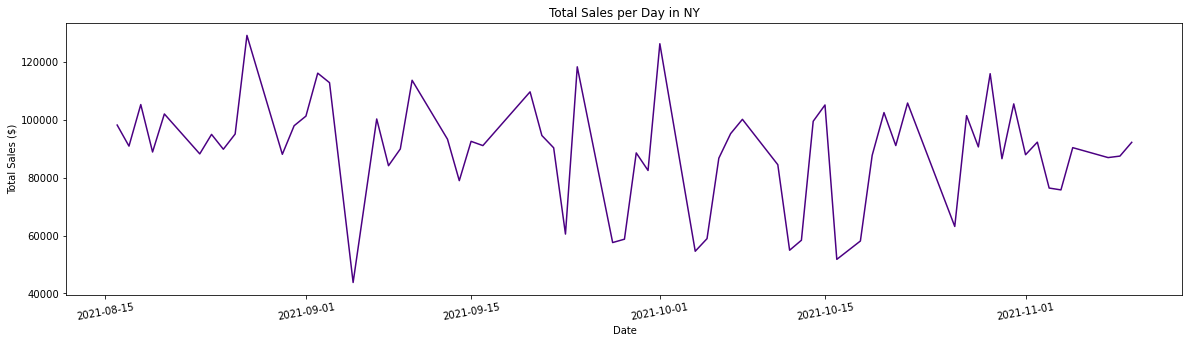

In [10]:
fig = plt.figure(figsize = (20, 5))
plt.plot(ny_daily_metrics.index, ny_daily_metrics['total_sales'], color='indigo')
plt.xticks(rotation = 10)
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales per Day in NY')
plt.show()

The graph above indicates that the total sales per day in NY fluctuated between 40,000 dollars and 120,000 dollars. The graph also suggests that that the data might be stationary, but there could be an element of seasonality. This will be investigated further when modeling.

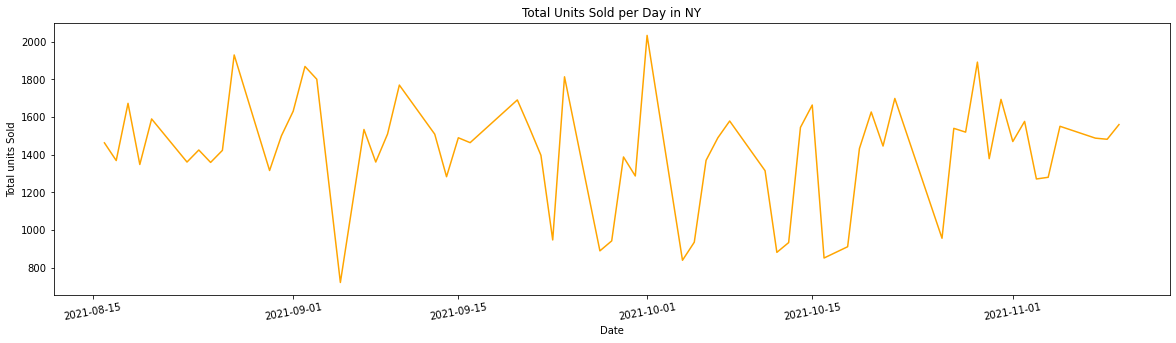

In [11]:
fig = plt.figure(figsize = (20, 5))
plt.plot(ny_daily_metrics.index, ny_daily_metrics['total_units'], color='orange')
plt.xticks(rotation = 10)
plt.xlabel('Date')
plt.ylabel('Total units Sold')
plt.title('Total Units Sold per Day in NY')
plt.show()

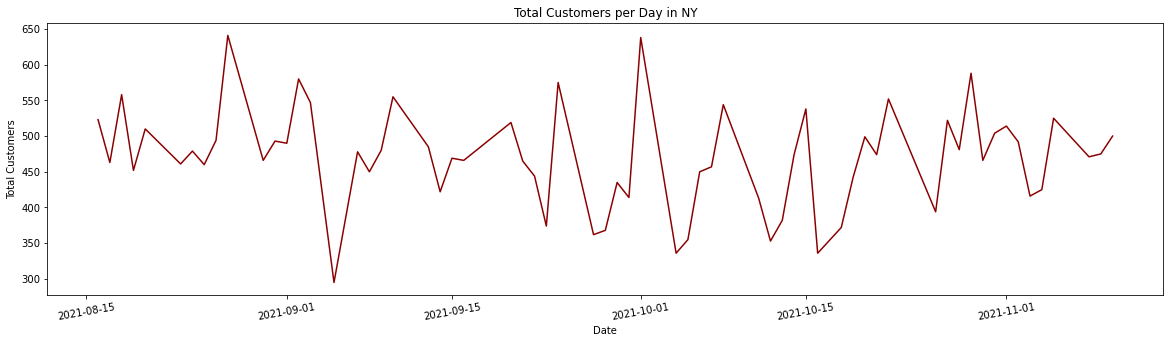

In [12]:
fig = plt.figure(figsize = (20, 5))
plt.plot(ny_daily_metrics.index, ny_daily_metrics['total_customers'], color='darkred')
plt.xticks(rotation = 10)
plt.xlabel('Date')
plt.ylabel('Total Customers')
plt.title('Total Customers per Day in NY')
plt.show()

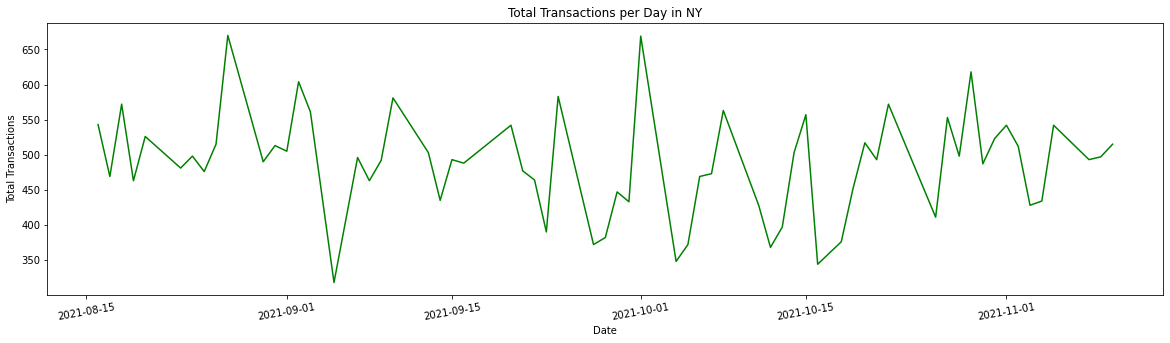

In [13]:
fig = plt.figure(figsize = (20, 5))
plt.plot(ny_daily_metrics.index, ny_daily_metrics['total_transactions'], color='green')
plt.xticks(rotation = 10)
plt.xlabel('Date')
plt.ylabel('Total Transactions')
plt.title('Total Transactions per Day in NY')
plt.show()

The 4 daily graphs above seem to have a strong positive correlation. Although this could seem obvious, it also indicates that there is negligable changes in prices or basket values on a daily basis.  If prices were increasing, it would have been reflected on the graph by spikes in the dollar value sales per day with less than proportionate increases in units sold or transactions processed per day. 

Therefore, it could be assumed that prices are relatively stable in NY (over the period analyzed).

#### Adoption of New Customers

In [14]:
customers_transaction_dates = ny_df \
    .groupby(['os__user_id', 'os__checkout_date']) \
    .agg(
        number_of_trans = pd.NamedAgg('os__cart_id', 'nunique')
    ) \
    .sort_values(['os__user_id', 'os__checkout_date'],  ascending=[False, True])

customer_ids = []
first_transaction_date = []

for customer, date in customers_transaction_dates.index:
    if customer not in customer_ids:
        customer_ids.append(customer)
        first_transaction_date.append(date)

new_customers_per_day = pd.DataFrame(list(zip(customer_ids, first_transaction_date)), columns =['customer_id', 'first_transaction_date'])
new_customers_per_day = new_customers_per_day \
    .groupby('first_transaction_date') \
    .agg(
        number_of_new_customers = pd.NamedAgg('customer_id', 'nunique')
    ) \
    .sort_values('first_transaction_date', ascending=True)

cumulative_customers_per_day = new_customers_per_day
cumulative_customers_per_day['cumulative_number_of_customers'] = cumulative_customers_per_day['number_of_new_customers'].cumsum()

In [15]:
cumulative_customers_per_day.head()

,number_of_new_customers,cumulative_number_of_customers
first_transaction_date,,
2021-08-16,523,523
2021-08-17,441,964
2021-08-18,504,1468
2021-08-19,389,1857
2021-08-20,410,2267


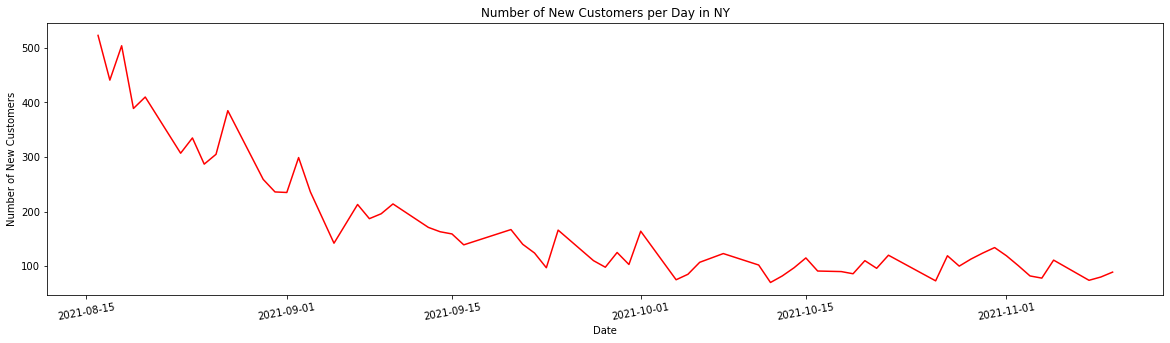

In [16]:
fig = plt.figure(figsize = (20, 5))
plt.plot(cumulative_customers_per_day.index, cumulative_customers_per_day['number_of_new_customers'], color='red')
plt.xticks(rotation = 10)
plt.xlabel('Date')
plt.ylabel('Number of New Customers')
plt.title('Number of New Customers per Day in NY')
plt.show()

The graph of new customers per day in NY indicates that there was a high influx of new customers at start of the analysis period, and the rate at which new customers joined the eCommerce platform decreased over time.

This is a negative sign because NY is a new and supposedly emerging market. Therefore, one would expect that (if this market makes sense) customers would be rushing to join the platform. However, the rate of adoption of the platform is decreasing over time, and this could suggest that NY is not an ideal cannabis market (at the moment).

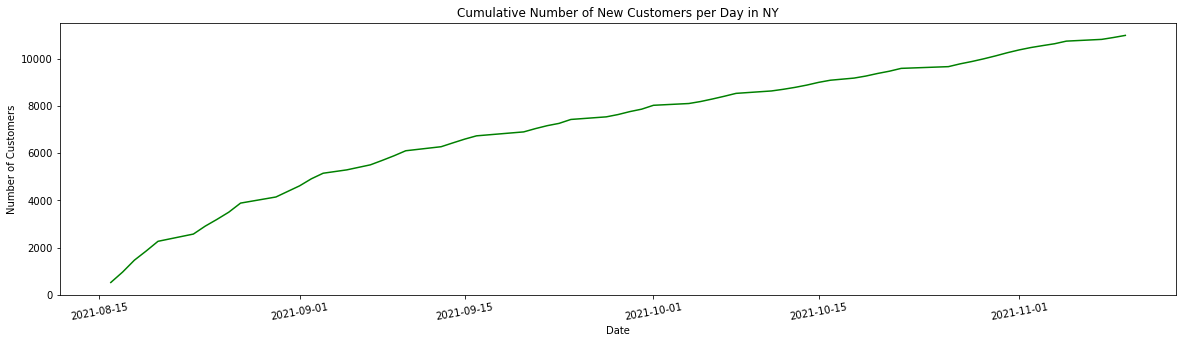

In [17]:
fig = plt.figure(figsize = (20, 5))
plt.plot(cumulative_customers_per_day.index, cumulative_customers_per_day['cumulative_number_of_customers'], color='green')
plt.xticks(rotation = 10)
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.title('Cumulative Number of New Customers per Day in NY')
plt.show()

The graph of cumulative customers per day in NY further contextualize the graph of new customers per day. Within the cumulative customers graph, it can be seen that there was a period of high growth at the start of the analysis period, and this growth rate slowed over time. 

Unfortunately, the data set does not have an attribute or column for customer `churn` to be analyzed. Although the rate of customer acquisition is declining, it is possible that DEV has outstanding `retention` metrics. This sets up two potential paths for DEV -- focus on retention by developing new products and offerings for their 'loyal' customer base, or generate incentives to attract new customers to the platform. Understanding the cannabis industry, however, the first path seems more impactful. This is because the cannabis industry is still relatively taboo and only customers who are interested in cannabis products will purchase cannabis products. Said differently, it might be more difficult to entice consumers to become cannabis users, and it would be time better spent retaining the existing customers.

Although churn cannot be analyzed, `customer frequency and usage` is an important metric to unpack.

#### Customer Frequency and Usage

In [18]:
num_of_transactions = ny_df \
    .groupby('os__user_id') \
    .agg(
        number_of_transactions = pd.NamedAgg('os__cart_id', 'nunique')
    ) 

num_of_transactions.reset_index(inplace=True)

customer_frequency = num_of_transactions \
    .groupby('number_of_transactions') \
    .agg(
        number_of_customers = pd.NamedAgg('os__user_id', 'nunique')
    ) \
    .sort_values('number_of_transactions', ascending=True)
customer_frequency['pct_of_customers'] = (customer_frequency.number_of_customers) * 100 / np.sum(customer_frequency.number_of_customers)

In [19]:
customer_frequency.head()

,number_of_customers,pct_of_customers
number_of_transactions,,
1,4778,43.475887
2,2347,21.355778
3,1294,11.774340
4,799,7.270246
5,482,4.385805


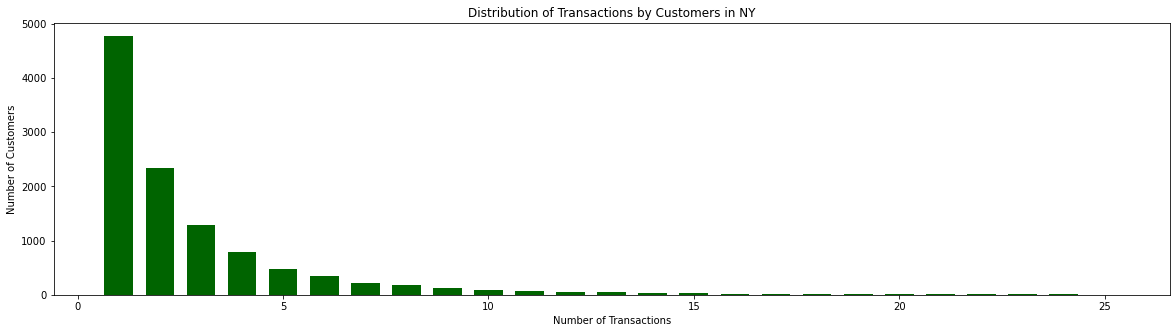

In [20]:
# creating a barplot for customer number of transactions
fig = plt.figure(figsize = (20, 5))
plt.bar(customer_frequency.index[:25], customer_frequency['number_of_customers'][:25], color='darkgreen', width=0.7)
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.title('Distribution of Transactions by Customers in NY')
plt.show()

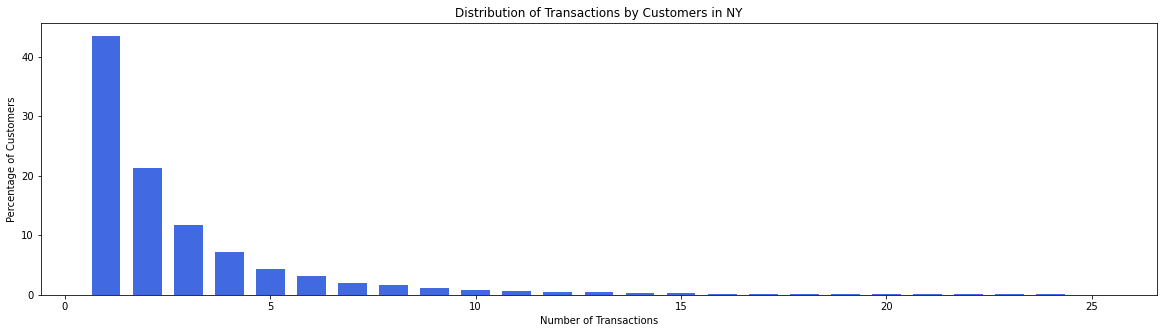

In [21]:
# creating a barplot for customer number of transactions
fig = plt.figure(figsize = (20, 5))
plt.bar(customer_frequency.index[:25], customer_frequency['pct_of_customers'][:25], color='royalblue', width=0.7)
plt.xlabel('Number of Transactions')
plt.ylabel('Percentage of Customers')
plt.title('Distribution of Transactions by Customers in NY')
plt.show()

Customer frequency and usage refer to how many transactions a customer makes and how often they return to the platform. Ideally, the DEV platform has a large number of customers making multiple purchases and returning very frequently. 

The graphs above tell a different story. From graphs of distribution of transactions by customers, it can be seen that most customers (~40 percent) made only 1 transaction on the platform during the analysis period. It should be noted that there were also groups of customers making 15-25 transactions during the analysis period. This indicates that there could be multiple segments of customers within the data set, and that these customers have different purchasing behavior.

Therefore, in an effort to achieve high retention metrics, it would be important for DEV to identify these customer segments, analyze and undestand them, and develop products or campaigns specifically tailored for each. This would be a major part of the desired recommendation system, as each customer segment (and individual customer) would have its own usage profile.

### Basket Analysis

Before understanding the customer segments, a significant part of the recommendation system is being able to identify what customer are purchasinig and how frequently are they purchasing these items together.

To uncover what customers were purchasing, DEV found the top brands, product categories, and products (ranked by dollar value sales), and graphed the distributions of these outcomes.

To uncover what customers were purchasing together, DEV utilized Association RUle Mining (ARM). ARM uses three key components to determine and rank ‘rules’: the support, the confidence, and the lift. The support refers to how frequently a particular response appears with the data set compared to all responses within the data set, the confidence refers to how frequently combinations of responses appear together with the data set compared to how frequently one of the items in the combination appear within the data set, and the lift refers to the ratio of the confidence to the ‘expected confidence’.

To interpret these metrics, suppose that there exists a set of items where A and B are subsets of this set. For this scenario, let us also assume that we are investigating rules which state that A implies B.

The `support` of A implies B would be the number of observations which include both A and B, divided by the total number of observations within the data set. Suppose that this value was 0.6, then the support would suggest that 60% of observations include both A and B.

The `confidence` of A implies B would be the number of observations which include both A and B, divided by the number of observations which include A only. Suppose that this value was 1.0, then the confidence would suggest that 100% of observations in B appear in observations which contain A only.

The `lift` gives an indication as to how much the confidence has increasing that B will be included, given that A was already included.

#### Top Brands, Product Categories, and Products

In [22]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [23]:
ny_top_brands = ny_df \
    .groupby('p__serial_brand') \
    .agg(
        total_sales = pd.NamedAgg('os__sales', 'sum'),
        total_units = pd.NamedAgg('os__n_units', 'sum'),
        total_trasnactions = pd.NamedAgg('os__cart_id', 'nunique'),
        total_unique_customers = pd.NamedAgg('os__user_id', 'nunique'),
    ) \
    .sort_values('total_sales', ascending=False)

ny_top_brands.head(10)

,total_sales,total_units,total_trasnactions,total_unique_customers
p__serial_brand,,,,
curaleaf,2008801.58,29920.0,14130,5075
columbiacare,1291400.53,22221.0,9422,4636
vireo,1266105.30,18415.0,8693,4267
matter,656917.24,10956.0,5636,2907
select,175266.25,2597.0,1599,915
n,127258.72,2173.0,1642,1083
etain,113864.85,1790.0,1068,702
charlottesweb,13182.50,322.0,252,196
wyld,12685.83,456.0,280,217


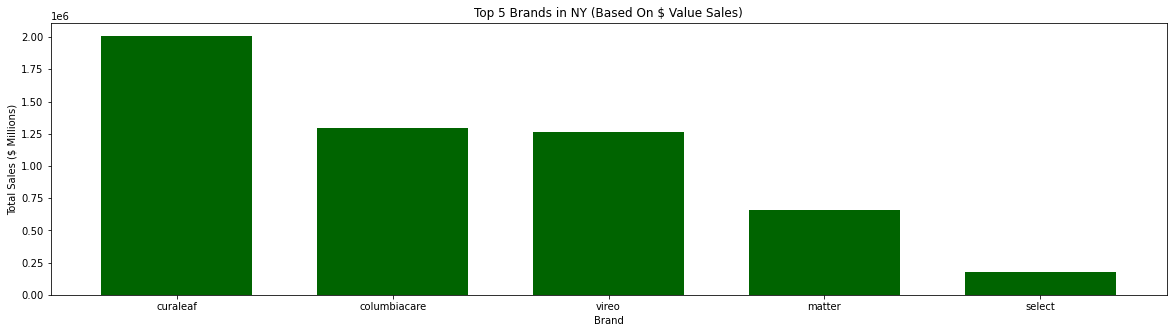

In [24]:
# creating a barplot for the top 5 brands
fig = plt.figure(figsize = (20, 5))
plt.bar(ny_top_brands.index[:5], ny_top_brands['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Brand')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Brands in NY (Based On $ Value Sales)')
plt.show()

The graph of top brands in NY show that `curaleaf` dominates the market, totaling ~1.5x in sales than its closest competitor (`columbiacare`). 

It should also be noted that curaleaf did not only dominate in dollar value sales, but in units sold, transactions processed, and number of customers as well. This is particularly significant becuase the average value of products from curaleaf is ~67 dollars while the average value of products from columbiacare is ~58 dollars. Therefore, even though products from curaleaf are ~10 dollars higher than curaleaf's closest competitor, more customers still gravitate towards curaleaf.

In [25]:
ny_top_product_categories = ny_df \
    .groupby('p__product_category_name') \
    .agg(
        total_sales = pd.NamedAgg('os__sales', 'sum'),
        total_units = pd.NamedAgg('os__n_units', 'sum'),
        total_trasnactions = pd.NamedAgg('os__cart_id', 'nunique'),
        total_unique_customers = pd.NamedAgg('os__user_id', 'nunique'),
    ) \
    .sort_values('total_sales', ascending=False)

ny_top_product_categories.head(10)

,total_sales,total_units,total_trasnactions,total_unique_customers
p__product_category_name,,,,
vape,2225746.83,34128.0,15898,6243
flower,1687025.40,24420.0,13272,5167
edible,1149678.99,22898.0,9867,5228
tincture,335581.27,3790.0,2313,1476
extract,242250.80,2583.0,1699,930
topical,44307.95,1421.0,904,700
gear,32917.59,1549.0,1232,978
merch,411.00,25.0,21,18


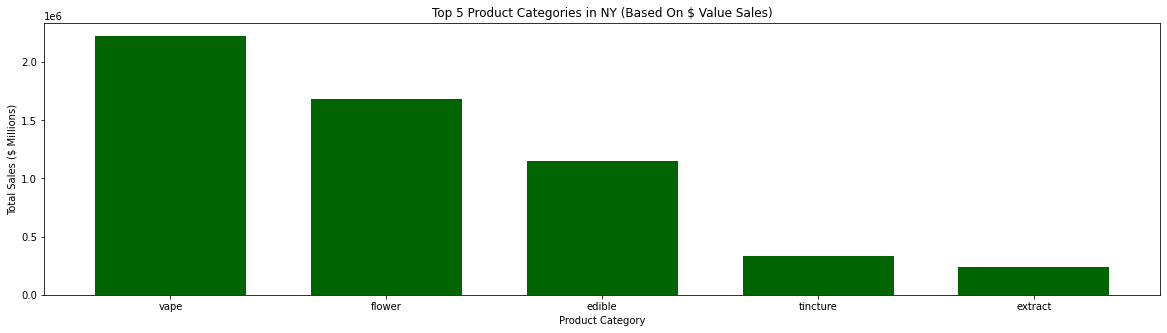

In [26]:
# creating a barplot for the top 5 product categories
fig = plt.figure(figsize = (20, 5))
plt.bar(ny_top_product_categories.index[:5], ny_top_product_categories['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Product Categories in NY (Based On $ Value Sales)')
plt.show()

The table and graph above indicate that `vape` products are most significant within NY, as they account for the largest portion of sales, units sold, transactions, and unique customers making purchases.

In [27]:
ny_top_brand_product_categories = ny_df \
    .groupby('p__brands_product_category') \
    .agg(
        total_sales = pd.NamedAgg('os__sales', 'sum'),
        total_units = pd.NamedAgg('os__n_units', 'sum'),
        total_trasnactions = pd.NamedAgg('os__cart_id', 'nunique'),
        total_unique_customers = pd.NamedAgg('os__user_id', 'nunique'),
    ) \
    .sort_values('total_sales', ascending=False)

ny_top_brand_product_categories.head(10)

,total_sales,total_units,total_trasnactions,total_unique_customers
p__brands_product_category,,,,
curaleaf -- flower,889666.00,11541.0,6938,2643
curaleaf -- vape,868547.83,13721.0,6755,2484
vireo -- vape,479877.15,6605.0,3777,1943
columbiacare -- edible,465187.14,9615.0,4564,2576
matter -- vape,418900.52,6095.0,3347,1745
columbiacare -- flower,391166.00,5384.0,3337,1797
columbiacare -- vape,290722.83,5441.0,2708,1439
vireo -- flower,229615.40,4489.0,2715,1683
vireo -- edible,190084.15,3165.0,1726,1043


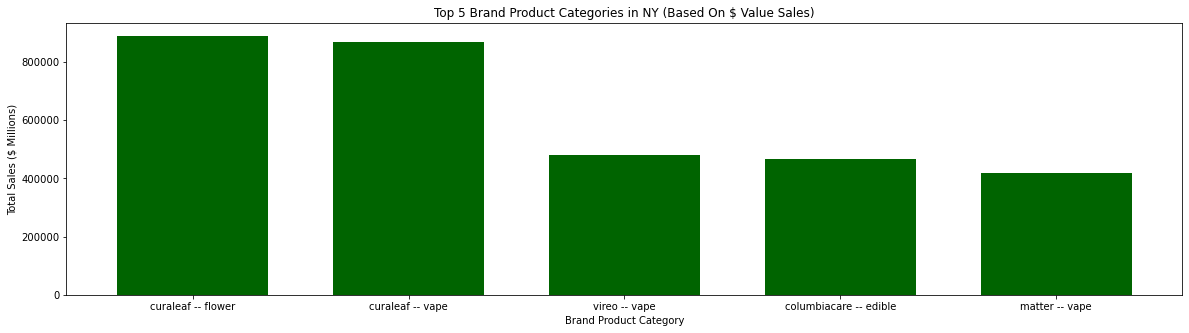

In [28]:
# creating a barplot for the top 5 product categories
fig = plt.figure(figsize = (20, 5))
plt.bar(ny_top_brand_product_categories.index[:5], ny_top_brand_product_categories['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Brand Product Category')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Brand Product Categories in NY (Based On $ Value Sales)')
plt.show()

The table and graph of top brand product categories within NY further showcase curaleaf's control over the NY market. The table and graph indicates that curaleaf flower and vape products dominate the market, with the total sales for these products outperforming the next closest product by ~1.85x. 

In [29]:
ny_top_brand_products = ny_df \
    .groupby('p__granular_product') \
    .agg(
        total_sales = pd.NamedAgg('os__sales', 'sum'),
        total_units = pd.NamedAgg('os__n_units', 'sum'),
        total_trasnactions = pd.NamedAgg('os__cart_id', 'nunique'),
        total_unique_customers = pd.NamedAgg('os__user_id', 'nunique'),
    ) \
    .sort_values('total_sales', ascending=False)

ny_top_brand_products.head(10)

,total_sales,total_units,total_trasnactions,total_unique_customers
p__granular_product,,,,
Vireo Red Full-Spectrum Distillate Vaporizer Cartridge [1000mg]--vape by vireo,232624.50,2398.0,1567,906
TheraCeed (High THC) .5g--vape by columbiacare,185615.50,2710.0,1348,670
20:1 INP--flower by curaleaf,90875.75,1194.0,1006,594
20:1 EF90 FPB [0.5mL]--vape by matter,83928.77,1148.0,843,496
Vireo Red Full-Spectrum Distillate Vaporization Syringe [1g]--extract by vireo,79156.00,1075.0,658,452
KTK Red Ground Metered Flower--flower by vireo,74547.75,1497.0,1084,725
Vireo Red Full-Spectrum Distillate Vaporizer Cartridge--vape by vireo,74360.85,1132.0,770,475
Vireo Extra Strength Red Softgels--edible by vireo,73088.00,936.0,635,368
Vireo Yellow Full-Spectrum Distillate Vaporizer Cartridge--vape by vireo,70863.10,907.0,685,417


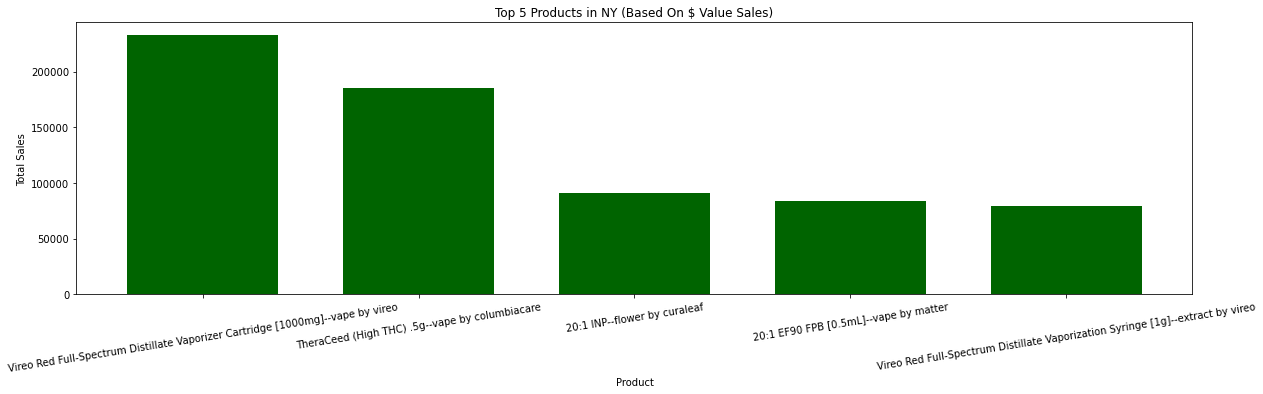

In [30]:
# creating a barplot for the top 5 product categories
fig = plt.figure(figsize = (20, 5))
plt.bar(ny_top_brand_products.index[:5], ny_top_brand_products['total_sales'][:5], color='darkgreen', width=0.7)
plt.xticks(rotation = 9)
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Top 5 Products in NY (Based On $ Value Sales)')
plt.show()

The top SKU, however, is not a product from curaleaf. Rather, the top SKU is from the third best brand within the NY market -- `vireo`.

Curaleaf's product makes it on the top SKUs list in third place, being vastly outperformed by vireo's and columbiacare's products. When this is analyzed in the context of the graphs and tables shown previously, this finding is not that surprising. Although curaleaf's product is not the top product (by dollar value sales), curaleaf outperfoms the competition in terms of the number of units sold, transactions, and unique customers making purchases. Additionally, curaleaf's products are more expensive. Therefore, although their product is not the top product, curaleaf is the top brand because it has more SKUs that fall higher up on the top SKUs list than other brands.

#### How many items are in the basket?

In [79]:
basket_sizes = ny_df \
    .groupby('os__cart_id') \
    .agg(
        total_value = pd.NamedAgg('os__sales', 'sum'),
        total_units = pd.NamedAgg('os__n_units', 'sum'),
        total_brands = pd.NamedAgg('p__serial_brand', 'nunique'),
        total_product_categories = pd.NamedAgg('p__product_category_name', 'nunique'),
        total_skus = pd.NamedAgg('p__granular_product', 'nunique'),
    )

print('The average basket value in NY (over the analysis period) is ~${:.2f}.'.format(np.mean(basket_sizes.total_value)))
print('The average number of units within a basket in NY (over the analysis period) is ~{}.'.format(np.mean(basket_sizes.total_units)))
print('The average number of brands within basket in NY (over the analysis period) is ~{}.'.format(np.mean(basket_sizes.total_brands)))
print('The average number of product categories within a basket in NY (over the analysis period) is ~{}.'.format(np.mean(basket_sizes.total_product_categories)))
print('The average number of SKUs within a basket in NY (over the analysis period) is ~{}.'.format(np.mean(basket_sizes.total_units)))

The average basket value in NY (over the analysis period) is ~$183.27.
The average number of units within a basket in NY (over the analysis period) is ~2.910798423026379.
The average number of brands within basket in NY (over the analysis period) is ~1.4148850924709124.
The average number of product categories within a basket in NY (over the analysis period) is ~1.4489566973300427.
The average number of SKUs within a basket in NY (over the analysis period) is ~2.910798423026379.


The findings above are particularly useful for the basket analysis. 

The previous insight signifies that customers typically have ~3 items in the basket, each priced at ~$62 dollars.

Additioanlly, there customers usually have 1 - 2 brands and product categories within thier basket, and ~ 3 distinct SKUs. Therefore, it raises the questions -- `what are customers purchasing together?`

#### Brands Basket Analysis

In [31]:
brands_basket = (ny_df \
     .groupby(['os__cart_id', 'p__serial_brand'])['os__n_units'] \
     .sum() \
     .unstack() \
     .reset_index() \
     .fillna(0) \
     .set_index('os__cart_id')
)

brands_basket_sets = brands_basket.applymap(encode_units)

In [32]:
brands_basket_sets.head()

p__serial_brand,airvape,beboe,cbdforlife,cbdluxe,cbdmedic,ccell,charlottesweb,coloradohemphoney,columbiacare,curaleaf,earthtomind,ego,elevate,etain,extractlabs,eyce,fiorellopharmaceuticals,five,flowermate,foy,goldleaf,gpen,greengoods,grn,kaleidoscopelabs,kandypens,keeper,kushqueen,lazarus,lazarusnaturals,lucidgarden,mantramask,marysmedicinals,marysnutritionals,matter,medterra,mig,mrmoxeys,n,ocb,ohho,ooze,palm,pax,plantpeople,puffco,raw,rythm,sandland,select,thegoodpatch,treaty,vertly,vessel,vibes,vireo,wyld,wyldcbd,yocan
os__cart_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12718505,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14997584,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
20637106,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21179144,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21497893,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
brands_frequent_itemsets = apriori(brands_basket_sets, min_support=0.001, use_colnames=True)

In [34]:
brands_rules = association_rules(brands_frequent_itemsets, metric="confidence", min_threshold=0.01)
brands_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cbdforlife),(curaleaf),0.001603,0.452867,0.001186,0.740000,1.634034,0.000460,2.104357
1,(ccell),(vireo),0.001442,0.278631,0.001122,0.777778,2.791429,0.000720,3.246162
2,(charlottesweb),(columbiacare),0.008077,0.301997,0.002660,0.329365,1.090624,0.000221,1.040809
3,(curaleaf),(charlottesweb),0.452867,0.008077,0.005513,0.012174,1.507152,0.001855,1.004147
4,(charlottesweb),(curaleaf),0.008077,0.452867,0.005513,0.682540,1.507152,0.001855,1.723469


The table above shows the brands that customers typcially purchase together. 

The first row of the table shows that if customers have products from `cbdforlife` within their basket, then they are ~74 percent likely to also have products from `curaleaf` within their basket. The lift for this observation is greater than 1. Therefore, there is increased confidence that curaleaf will be included, given that cbdforlife was already included. 

Although this lift is greater than 1, it is not the most significant lift within the table. Row 2 within the table shows the greates lift, having a value of `2.79`. Therefore, there is the largest increase in confidence that products from `vireo` will be included in a customer's basket, given that products from `ccell` was already included within the basket.

#### Brands and Product Category Basket Analysis

In [35]:
brands_productcategories_basket = (ny_df \
     .groupby(['os__cart_id', 'p__brands_product_category'])['os__n_units'] \
     .sum() \
     .unstack() \
     .reset_index() \
     .fillna(0) \
     .set_index('os__cart_id')
)

brands_productcategories_basket_sets = brands_productcategories_basket.applymap(encode_units)

In [36]:
brands_productcategories_basket_sets.head()

p__brands_product_category,airvape -- gear,beboe -- topical,cbdforlife -- tincture,cbdforlife -- topical,cbdluxe -- topical,cbdmedic -- topical,ccell -- gear,charlottesweb -- edible,charlottesweb -- tincture,charlottesweb -- topical,coloradohemphoney -- edible,columbiacare -- edible,columbiacare -- extract,columbiacare -- flower,columbiacare -- gear,columbiacare -- tincture,columbiacare -- topical,columbiacare -- vape,curaleaf -- edible,curaleaf -- extract,curaleaf -- flower,curaleaf -- gear,curaleaf -- tincture,curaleaf -- vape,earthtomind -- tincture,ego -- gear,elevate -- topical,etain -- edible,etain -- gear,etain -- tincture,etain -- topical,etain -- vape,extractlabs -- topical,eyce -- gear,fiorellopharmaceuticals -- gear,five -- edible,flowermate -- gear,foy -- tincture,goldleaf -- gear,gpen -- gear,greengoods -- merch,grn -- edible,grn -- tincture,grn -- topical,kaleidoscopelabs -- edible,kandypens -- gear,keeper -- topical,kushqueen -- topical,lazarus -- tincture,lazarus -- topical,lazarusnaturals -- edible,lucidgarden -- edible,lucidgarden -- tincture,mantramask -- topical,marysmedicinals -- topical,marysnutritionals -- topical,matter -- edible,matter -- flower,matter -- gear,matter -- tincture,matter -- vape,medterra -- edible,mig -- gear,mrmoxeys -- edible,n -- edible,n -- flower,n -- gear,n -- merch,n -- topical,ocb -- gear,ohho -- tincture,ooze -- gear,palm -- gear,pax -- gear,plantpeople -- tincture,plantpeople -- topical,puffco -- gear,raw -- gear,rythm -- gear,sandland -- edible,select -- edible,select -- vape,thegoodpatch -- topical,treaty -- tincture,vertly -- topical,vessel -- gear,vibes -- gear,vireo -- edible,vireo -- extract,vireo -- flower,vireo -- tincture,vireo -- topical,vireo -- vape,wyld -- edible,wyldcbd -- edible,yocan -- gear
os__cart_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12718505,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14997584,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
20637106,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21179144,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21497893,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
brands_productcategories_frequent_itemsets = apriori(brands_productcategories_basket_sets, min_support=0.001, use_colnames=True)

In [38]:
brands_productcategories_rules = association_rules(brands_productcategories_frequent_itemsets, metric="confidence", min_threshold=0.01)
brands_productcategories_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(charlottesweb -- edible),(columbiacare -- edible),0.007468,0.146287,0.001795,0.240343,1.642961,0.000702,1.123815
1,(columbiacare -- edible),(charlottesweb -- edible),0.146287,0.007468,0.001795,0.012270,1.642961,0.000702,1.004861
2,(charlottesweb -- edible),(curaleaf -- edible),0.007468,0.074874,0.002083,0.278970,3.725849,0.001524,1.283061
3,(curaleaf -- edible),(charlottesweb -- edible),0.074874,0.007468,0.002083,0.027825,3.725849,0.001524,1.020940
4,(charlottesweb -- edible),(curaleaf -- flower),0.007468,0.222379,0.001571,0.210300,0.945685,-0.000090,0.984705


The table of brand-product category basket analysis has similar interpretation to the table of brand basket anlysis.

Most importantly within this table, it can be seen that the same product categories are typically purchased together.

#### Products Basket Analysis

In [39]:
products_basket = (ny_df \
     .groupby(['os__cart_id', 'p__granular_product'])['os__n_units'] \
     .sum() \
     .unstack() \
     .reset_index() \
     .fillna(0) \
     .set_index('os__cart_id')
)

products_basket_sets = products_basket.applymap(encode_units)

In [40]:
products_basket_sets.head()

p__granular_product,1000mg Blackberry CBD Gummies (40-pack)--edible by wyldcbd,1000mg Elderberry CBD:CBN Gummies (40-pack)--edible by wyld,1000mg Huckleberry CBD Gummies (40-pack)--edible by wyld,1000mg Lemon CBD Gummies (40-pack)--edible by wyld,1000mg Raspberry CBD Gummies (40-pack)--edible by wyld,1000mg Raspberry CBD Gummies (40-pack)--edible by wyldcbd,16:1 (150mg)--edible by curaleaf,19:1 Vireo Red Full-Spectrum Distillate Vaporizer Cartridge [300mg]--vape by vireo,1:1 Balance Powder (218mg CBD/218mg THC)--edible by etain,1:1 Balance Powder (250mg CBD/250mg THC)--edible by etain,1:1 CIN [400mg]--vape by curaleaf,1:1 EF90 TXC [0.5mL]--vape by matter,1:1 ES [30pk] (570mg)--edible by matter,1:1 Hybrid INZ [400mg]--vape by curaleaf,1:1 Hybrid [400mg]--vape by curaleaf,1:1 Indica INP [225mg]--vape by curaleaf,1:1 Indica INP [300mg]--vape by curaleaf,1:1 Indica KKU [225mg]--vape by curaleaf,1:1 Indica WPA [400mg]--vape by curaleaf,1:1 KKU [400mg]--vape by curaleaf,1:1 Lemon (300mg)--tincture by curaleaf,1:1 Lemon [20pk] (200mg)--edible by matter,1:1 MDH--flower by columbiacare,1:1 MHz--flower by columbiacare,1:1 Orange (300mg)--tincture by curaleaf,1:1 SDI [400mg]--vape by curaleaf,1:1 Sativa BDR [400mg]--vape by curaleaf,1:1 Sativa DTA [225mg]--vape by curaleaf,1:1 Sativa DTA [300mg]--vape by curaleaf,1:1 Sativa DTA [400mg]--vape by curaleaf,1:1 Sativa GCF [400mg]--vape by curaleaf,1:1 Sativa SCK [400mg]--vape by curaleaf,1:1 THC:CBD Green (200mg)--edible by matter,1:1 THC:CBD Green Extra [30pk]--edible by matter,1:1 THC:CBD Green [20pk]--edible by matter,1:1 THC:CBD Green [30pk]--edible by matter,1:1 THC:CBD Micro-Tablets - 5mg -[30pk]--edible by curaleaf,1:1 URK [400mg]--vape by curaleaf,1:1 Unflavored (300mg)--tincture by curaleaf,1:1 [30mL) (300mg)--tincture by matter,1:1 [30pk] (300mg)--edible by curaleaf,1:1 [30pk] (300mg)--edible by matter,1:15 THC:CBD Yellow [30pk]--edible by matter,1:15 [30mL) (801mg)--tincture by matter,1:15 [30pk] (801mg)--edible by matter,1:1:1 THC:CBD:CBN Midnight [30pk]--edible by vireo,1:20 (150mg)--edible by curaleaf,1:20 Lemon (300mg)--tincture by curaleaf,1:20 Orange (300mg)--tincture by curaleaf,1:20 RGR--flower by columbiacare,1:20 Unflavored (300mg)--tincture by curaleaf,20:1 (150mg)--edible by curaleaf,20:1 APP [400mg]--vape by curaleaf,20:1 APP--flower by curaleaf,20:1 BDR --flower by curaleaf,20:1 BDR [450mg]--extract by curaleaf,20:1 BDR--extract by curaleaf,20:1 Blue Capsule [30pk] (150mg)--edible by matter,20:1 Blue Capsule [30pk] (18mg)--edible by matter,20:1 Blue Capsule [30pk] (27mg)--edible by matter,20:1 CCM - Extra Strength--flower by curaleaf,20:1 CCM--flower by curaleaf,20:1 CPE [450mg]--extract by curaleaf,20:1 CPE--extract by curaleaf,20:1 CPE--flower by curaleaf,20:1 Cherry (150mg)--edible by curaleaf,20:1 DSC--flower by curaleaf,20:1 DTA--flower by curaleaf,20:1 Delta 8 [0.5mL]--vape by matter,20:1 EF90 BLD [0.5mL]--vape by matter,20:1 EF90 DTR [0.5mL]--vape by matter,20:1 EF90 FPB [0.5mL]--vape by matter,20:1 EF90 JH1 [0.5mL]--vape by matter,20:1 EF90 PLM [0.5mL]--vape by matter,20:1 EF90 PSH [0.5mL]--vape by matter,20:1 ES APP--flower by curaleaf,20:1 ES [30pk] (285mg)--edible by matter,20:1 FPB 14--flower by matter,20:1 FRC--flower by columbiacare,20:1 Forte (234mg)--edible by etain,20:1 Forte (25mg CBD/475mg THC)--edible by etain,20:1 Forte (342mg)--edible by etain,20:1 Forte (358mg)--edible by etain,20:1 Forte [30pk] (10mg CBD/200mg THC)--edible by etain,20:1 GBR--flower by columbiacare,20:1 GCF - Extra Strength--flower by curaleaf,20:1 GCF--flower by curaleaf,20:1 Hint of Sweet (150mg)--edible by select,20:1 Hybrid APP - Extra Strength--flower by curaleaf,20:1 Hybrid APP [225mg]--vape by curaleaf,20:1 Hybrid APP [300mg]--vape by curaleaf,20:1 Hybrid APP [425mg]--vape by curaleaf,20:1 Hybrid APP [450mg]--vape by curaleaf,20:1 Hybrid APP--flower by curaleaf,20:1 Hybrid BRY [425mg]--vape by curaleaf,20:1 Hybrid BRY [500mg]--vape by curaleaf,20:1 Hybrid GGF [425mg]--va

In [41]:
products_frequent_itemsets = apriori(products_basket_sets, min_support=0.001, use_colnames=True)

In [42]:
products_rules = association_rules(products_frequent_itemsets, metric="confidence", min_threshold=0.01)
products_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(20:1 THC:CBD Blue Extra [30pk]--edible by mat...,(1:1 THC:CBD Green Extra [30pk]--edible by mat...,0.018654,0.006539,0.001282,0.068729,10.511084,0.001160,1.066780
1,(1:1 THC:CBD Green Extra [30pk]--edible by mat...,(20:1 THC:CBD Blue Extra [30pk]--edible by mat...,0.006539,0.018654,0.001282,0.196078,10.511084,0.001160,1.220698
2,(20:1 APP--flower by curaleaf),(20:1 INP--flower by curaleaf),0.013141,0.032245,0.001987,0.151220,4.689759,0.001564,1.140172
3,(20:1 INP--flower by curaleaf),(20:1 APP--flower by curaleaf),0.032245,0.013141,0.001987,0.061630,4.689759,0.001564,1.051673
4,(20:1 BDR --flower by curaleaf),(20:1 INP--flower by curaleaf),0.007180,0.032245,0.001058,0.147321,4.568868,0.000826,1.134959


### Customer Clustering

In clustering analysis, the objective is to segment groups of observations into ‘clusters’, where the observations within one cluster are very similar to one another (based on a given set of attributes) but very dissimilar from the observations within another cluster.

For this analysis, DEV wanted to primarily cluster customers based on their amount spent on products, the number of units typically purchased, the number of distinct brands that they interacted with, and the number of distinct product categories purchased. The more similar that these metrics are to each other across customers, the more likely it is that they will be clustered together.

#### Searching for the optimal `K`

In [80]:
customer_metrics = ny_df \
    .groupby('os__user_id') \
    .agg(
        total_spend = pd.NamedAgg('os__sales', 'sum'),
        total_units = pd.NamedAgg('os__n_units', 'sum'),
        number_of_brands = pd.NamedAgg('p__serial_brand', 'nunique'),
        number_of_product_categories = pd.NamedAgg('p__product_category_name', 'nunique'),
    )
customer_metrics.sort_index(inplace=True)
customer_metrics.head()

,total_spend,total_units,number_of_brands,number_of_product_categories
os__user_id,,,,
1000480,569.90,11.0,3,1
1001951,340.00,4.0,1,1
1003293,376.25,6.0,4,1
1004085,238.40,4.0,2,2
1004965,260.00,5.0,1,2


Text(0, 0.5, 'WCSS')

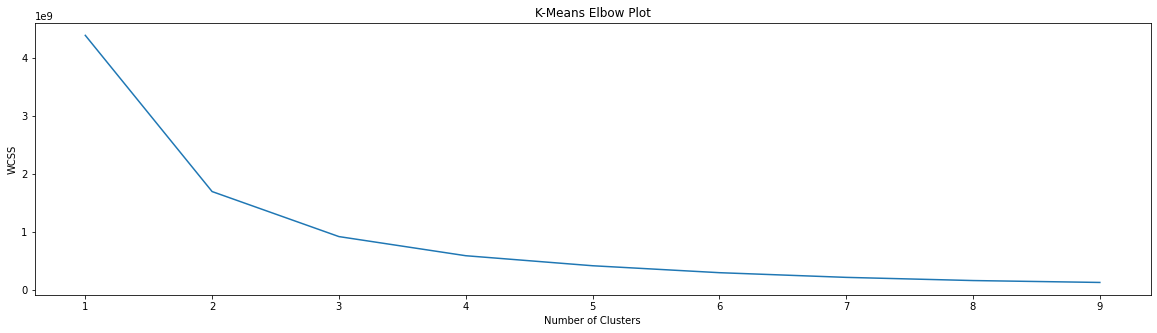

In [81]:
wcss=[]

for k in range(1, 10):
    kmeans = KMeans(k)
    kmeans.fit(customer_metrics)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1, 10)
fig = plt.figure(figsize = (20, 5))
plt.plot(number_clusters, wcss)
plt.title('K-Means Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

Through constant iteration and investigation, DEV settled that `6 clusters` were most appropriate.

#### Using `K` = `6`

In [82]:
customer_clusters = KMeans(6).fit_predict(customer_metrics)
customer_clusters

array([4, 0, 4, ..., 2, 4, 0])

In [83]:
customer_metrics['customer_cluster'] = customer_clusters
cluster_customer_ids = []

for customer in customer_metrics.index:
    cluster_customer_ids.append(customer)
    
customer_clusters_df = pd.DataFrame(list(zip(cluster_customer_ids, customer_clusters)), columns =['cluster_customer_id', 'customer_cluster'])
customer_clusters_df.head()

,cluster_customer_id,customer_cluster
0,1000480,4
1,1001951,0
2,1003293,4
3,1004085,0
4,1004965,0


In [84]:
ny_clusters = pd.merge(ny_df, customer_clusters_df, how='inner', left_on='os__user_id', right_on='cluster_customer_id')

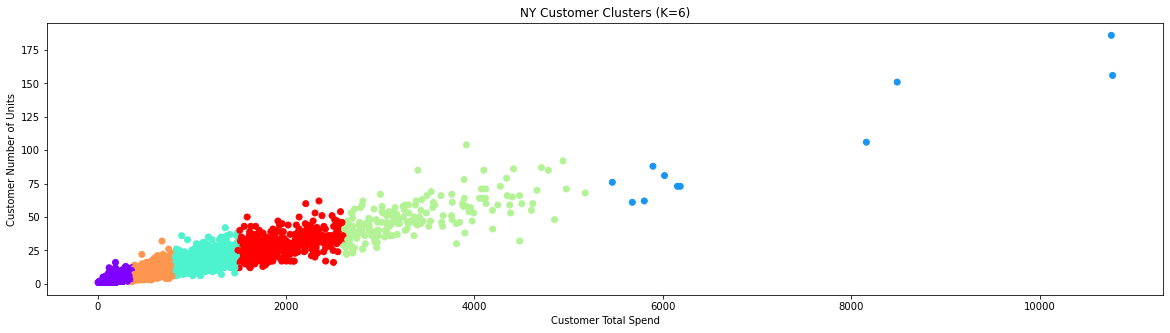

In [87]:
fig = plt.figure(figsize = (20, 5))
plt.scatter(customer_metrics['total_spend'], customer_metrics['total_units'], c=customer_metrics['customer_cluster'] ,cmap='rainbow')
plt.xlabel('Customer Total Spend')
plt.ylabel('Customer Number of Units')
plt.title('NY Customer Clusters (K=6)')
plt.show()

As can be seen from the graph above, customers within the 6 clusters have a distinct range for which they spend on products and have a distinct upper limit to the number of units purchased.

## Demand Forecasting

As seen from the clustering exercise, each segment of customers have a different purchasing behaviour. Therefore, it should be expected that the customer clusters will have various preferences and that they will demand different products. Hence -- demand forecasting.

`Demand forecasting` is a field of predictive analytics which tries to understand and predict customer demand to optimize supply decisions. More specifically, it is the process of making estimations about future customer demand over a defined period, using historical data. Proper demand forecasting gives businesses valuable information about their potential in their current market and other markets, so that informed decisions can be made about pricing, growth strategies, and market potential.

Without demand forecasting, businesses risk making poor decisions about their products and target markets – and ill-informed decisions can have far-reaching negative effects on inventory holding costs, customer satisfaction, supply chain management, and profitability.

Said differently, the main question here is `what should retailers within the NY have sufficient inventory of, such that they can meet the various demands of the customer segments?`

The type of model that will be used to uncover this will be `SARIMA` models. A SARIMA model is an extension of the ARIMA model, taking into consideration that the data has a seasonal component. 

In theory, the SARIMA (or SARIMAX -- SARIMA model with exogenous variables) model will be most apporpriate for this analysis because it has already been uncovered that there is seasonality to cannabis sales. Without considering the seasonality, any models products will vastly over predict or under predict the forecasted value, rending the model invalid. 

In [49]:
# selecting a training and testing set
number_of_customers_withing_clusters = customer_clusters_df \
    .groupby('customer_cluster') \
    .agg(
        nunber_of_customers = pd.NamedAgg('cluster_customer_id', 'nunique')
    ) \
    .sort_values('nunber_of_customers', ascending=False)

number_of_customers_withing_clusters

,nunber_of_customers
customer_cluster,
1,6229
0,2756
5,1259
4,551
2,184
3,11


In [50]:
# using a subset where customer_cluster == 1
modeling_df = ny_clusters[ny_clusters['customer_cluster']==1]

brand_product_category = modeling_df \
    .groupby('p__brands_product_category') \
    .agg(
        frequency = pd.NamedAgg('os__n_units', 'sum')
    ) \
    .sort_values('frequency', ascending=False)

brand_product_category.head() 

,frequency
p__brands_product_category,
columbiacare -- edible,2375.0
curaleaf -- vape,2241.0
curaleaf -- flower,1645.0
vireo -- vape,1512.0
vireo -- flower,1309.0


In [51]:
modeling_df = modeling_df[modeling_df['p__brands_product_category']=='columbiacare -- edible'] \
    .groupby('os__checkout_date') \
    .agg(
        total_sales = pd.NamedAgg('os__sales', 'sum'),
        total_units = pd.NamedAgg('os__n_units', 'sum')
    ) \
    .sort_values('os__checkout_date')
modeling_df.reset_index(inplace=True)
modeling_df.tail()

,os__checkout_date,total_sales,total_units
59,2021-11-04,1109.00,23.0
60,2021-11-05,2198.30,45.0
61,2021-11-08,1113.45,30.0
62,2021-11-09,1383.05,30.0
63,2021-11-10,1434.75,35.0


In [52]:
training_df = modeling_df[modeling_df['os__checkout_date'] <= '2021-10-19']
testing_df = modeling_df[modeling_df['os__checkout_date'] > '2021-10-19']
training_df.head()

,os__checkout_date,total_sales,total_units
0,2021-08-16,1326.55,28.0
1,2021-08-17,1918.80,37.0
2,2021-08-18,2217.00,42.0
3,2021-08-19,1840.10,35.0
4,2021-08-20,1508.70,33.0


In [53]:
print(len(training_df))
print(len(testing_df))

47
17


In [54]:
final_training_index = len(training_df)
new_testing_indicies = []
for i in range(0, len(testing_df)):
    new_index = final_training_index + i
    new_testing_indicies.append(new_index)
    
testing_df['new_index'] = new_testing_indicies
testing_df.set_index('new_index', inplace=True)

<ipython-input-54-d8ed711a096c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['new_index'] = new_testing_indicies


### Finding the best SARIMA model

In [55]:
def find_best_SARIMA(train_data, p_values, d_values, q_values, P_values, D_values, Q_values):
    
    best_AIC, best_pdq_cfg, best_seasonalpdq_cfg = float('inf'), None, None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            
                            pdq = (p, d, q)
                            seasonal_pdq = (P, D, Q, 365)
                            
                            try:
                                sarima_model = sm.tsa.statespace.SARIMAX(
                                    train_data,
                                    order=pdq,
                                    seasonal_order=seasonal_pdq,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False
                                )
                                sarima_model_results = sarima_model.fit()
                                sarima_AIC = sarima_model_results.aic
                                
                                if sarima_AIC < best_AIC:
                                    best_AIC, best_pdq_cfg, best_seasonalpdq_cfg = sarima_AIC, pdq, seasonal_pdq
                                print('SARIMA {}{}, AIC: {}'.format(pdq, seasonal_pdq, sarima_AIC))
                            except:
                                continue
                                
                                
    print('The best SARIMA model is SARIMA {}{}, with an AIC of ~{}.'.format(best_pdq_cfg, best_seasonalpdq_cfg, best_AIC))

In [56]:
# p_values = range(1, 3)
# d_values = range(1, 2)
# q_values = range(1, 3)
# P_values = range(1, 3)
# D_values = range(1, 2)
# Q_values = range(1, 3)
# find_best_SARIMA(
#     training_df.total_sales,
#     p_values,
#     d_values,
#     q_values,
#     P_values,
#     D_values,
#     Q_values
# )

After attempting to generate the SARIMA model, it was found that there was unsufficient data for the model to learn and estimate model parameters. This is unfortunate, and it is a limitation of the data sample selected. For future analysis, DEV will investigate generating SARIMA models using a longer time-span of data.

### Not enough data to use SARIMA -- using ARIMA

In [57]:
# def find_best_ARIMA(train_data, test_df, test_df_series, p_values, d_values, q_values):
#     best_score, best_cfg = float('inf'), None
#     for p in p_values:
#         for d in d_values:
#             for q in q_values:
#                 order = (p, d, q)
#                 try:
#                     arima_model = ARIMA(train_data, order=order)
#                     arima_model_results = arima_model.fit(maxiter=500)
#                     arima_model_forecast, arima_model_se, arima_model_conf_interval = arima_model_results.forecast(len(test_df), alpha=0.05)
#                     arima_model_forecast_series = pd.Series(arima_model_forecast, index=test_df.test_df_series.index)
#                     rmse = calculate_model_accuracy(test_df.test_df_series, arima_model_forecast_series)
                    
#                     if rmse < best_score:
#                         best_score, best_cfg = rmse, order
#                     print('ARIMA%s RMSE=%.3f' % order(order, rmse))
                    
#                 except:
#                     continue
#     print('Best ARIMA %s RMSE=%.3f' % (best_cfg, best_score))

In [58]:
# p_values = range(0, 5)
# d_values = range(0, 2)
# q_values = range(0, 4)
# # warnings.filterwarnings('ignore')
# find_best_ARIMA(training_df.total_sales, testing_df, 'total_sales', p_values, d_values, q_values)

In [59]:
# using ARIMA(p, d, q)
# -- let p=0, d=0, q=0
arima_model_000 = ARIMA(training_df.total_sales, order=(0, 0, 0))
arima_model_000_results = arima_model_000.fit(maxiter=500)  
print(arima_model_000_results.summary())

                              ARMA Model Results                              
Dep. Variable:            total_sales   No. Observations:                   47
Model:                     ARMA(0, 0)   Log Likelihood                -372.483
Method:                           css   S.D. of innovations            669.306
Date:                Wed, 24 Nov 2021   AIC                            748.967
Time:                        13:40:39   BIC                            752.667
Sample:                             0   HQIC                           750.359
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1731.3602     97.628     17.734      0.000    1540.012    1922.708


C:\Users\trist\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [60]:
arima_model_000_forecast, arima_model_000_se, arima_model_000_conf_interval = arima_model_000_results.forecast(len(testing_df), alpha=0.05)
arima_model_000_forecast_series = pd.Series(arima_model_000_forecast, index=testing_df.total_units.index)
arima_model_000_conf_interval_lower = pd.Series(arima_model_000_conf_interval[:, 0], index=testing_df.total_units.index)
arima_model_000_conf_interval_upper = pd.Series(arima_model_000_conf_interval[:, 1], index=testing_df.total_units.index)

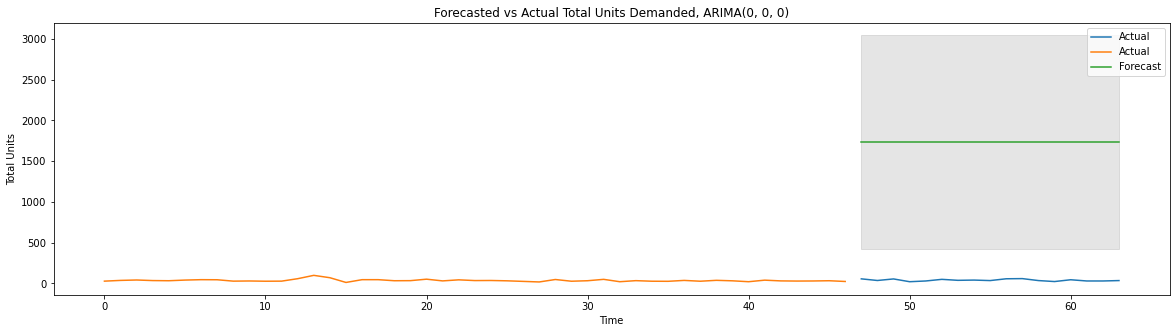

In [61]:
fig = plt.figure(figsize = (20, 5))
plt.plot(testing_df.total_units, label='Actual')
plt.plot(training_df.total_units, label='Actual')
plt.plot(arima_model_000_forecast_series, label='Forecast')
plt.fill_between(arima_model_000_conf_interval_lower.index, arima_model_000_conf_interval_lower, arima_model_000_conf_interval_upper, color='k', alpha=0.10)
plt.xlabel('Time')
plt.ylabel('Total Units')
plt.title('Forecasted vs Actual Total Units Demanded, ARIMA(0, 0, 0)')
plt.legend()
plt.show()

As expected, the ARIMA model performed poorly when predicting future demand. Similar to the issues within the SARIMA model, the ARIMA model was not able to learn and appropriately estimate model parameters. Rather, the model generated a constant as the output, and the 95 percent confidence interval for the forecasts does not contain the actual values. This is a strong indication that the ARIMA model performed poorly, and DEV was not able to predict the future demand for the customer clusters.

## Pivot -- Reporting Metrics per Customer Cluster

Therefore, DEV decided to pivot towards uncovering what the current preferences were for the various customer clusters. 

### Top Brands, Product Categories, and Products

In [62]:
def get_customer_cluster_top_brands(customer_cluster=1):
    
    cluster_df = ny_clusters[ny_clusters['customer_cluster']==customer_cluster]
    
    cluster_top_brands = cluster_df \
        .groupby('p__serial_brand') \
        .agg(
            total_sales = pd.NamedAgg('os__sales', 'sum'),
            total_units = pd.NamedAgg('os__n_units', 'sum'),
            total_transactions = pd.NamedAgg('os__cart_id', 'nunique'),
        ) \
        .sort_values('total_sales', ascending=False)
    cluster_top_brands['customer_cluster'] = [customer_cluster] * len(cluster_top_brands)
    
    cluster_top_product_categories = cluster_df \
        .groupby('p__product_category_name') \
        .agg(
            total_sales = pd.NamedAgg('os__sales', 'sum'),
            total_units = pd.NamedAgg('os__n_units', 'sum'),
            total_transactions = pd.NamedAgg('os__cart_id', 'nunique'),
        ) \
        .sort_values('total_sales', ascending=False)
    cluster_top_product_categories['customer_cluster'] = [customer_cluster] * len(cluster_top_product_categories)
    
    cluster_top_brand_product_categories = cluster_df \
        .groupby('p__brands_product_category') \
        .agg(
            total_sales = pd.NamedAgg('os__sales', 'sum'),
            total_units = pd.NamedAgg('os__n_units', 'sum'),
            total_transactions = pd.NamedAgg('os__cart_id', 'nunique'),
        ) \
        .sort_values('total_sales', ascending=False)
    cluster_top_brand_product_categories['customer_cluster'] = [customer_cluster] * len(cluster_top_brand_product_categories)
    
    cluster_top_product = cluster_df \
        .groupby('p__granular_product') \
        .agg(
            total_sales = pd.NamedAgg('os__sales', 'sum'),
            total_units = pd.NamedAgg('os__n_units', 'sum'),
            total_transactions = pd.NamedAgg('os__cart_id', 'nunique'),
        ) \
        .sort_values('total_sales', ascending=False)
    cluster_top_product['customer_cluster'] = [customer_cluster] * len(cluster_top_product)
    
    output = {
        'brands': cluster_top_brands,
        'product_categories': cluster_top_product_categories,
        'brand_product_categories': cluster_top_brand_product_categories,
        'products': cluster_top_product,
    }
    return output

In [63]:
top_brand_metrics_c0 = get_customer_cluster_top_brands(0)
top_brand_metrics_c1 = get_customer_cluster_top_brands(1)
top_brand_metrics_c2 = get_customer_cluster_top_brands(2)
top_brand_metrics_c3 = get_customer_cluster_top_brands(3)
top_brand_metrics_c4 = get_customer_cluster_top_brands(4)
top_brand_metrics_c5 = get_customer_cluster_top_brands(5)

#### Brands

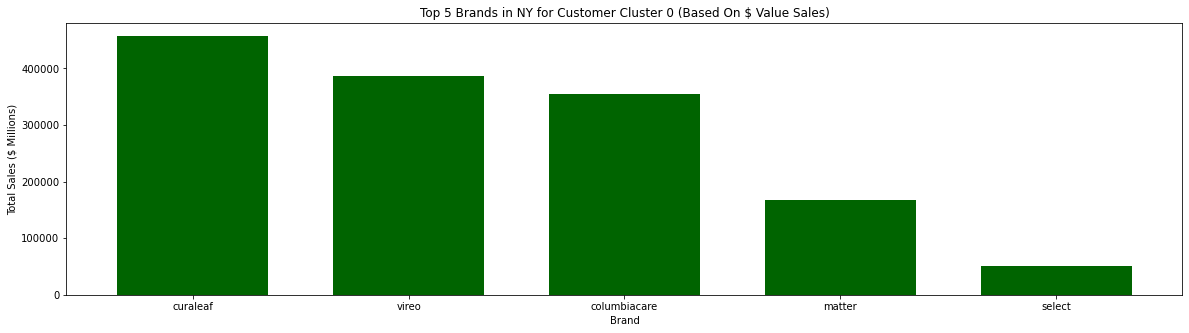

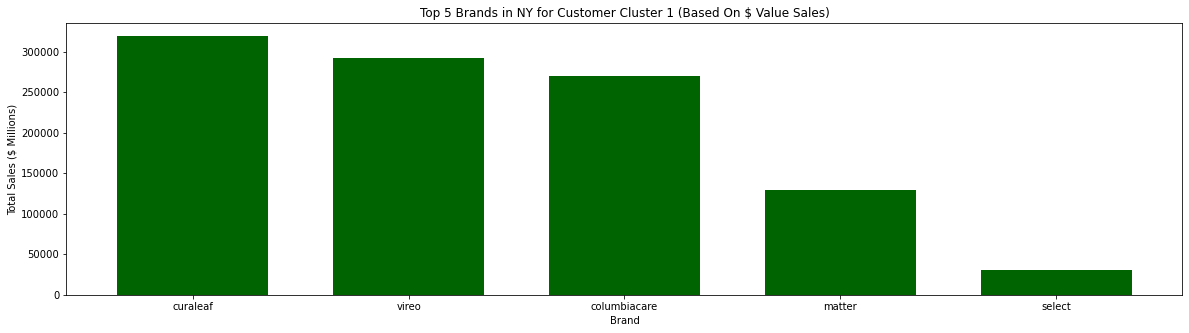

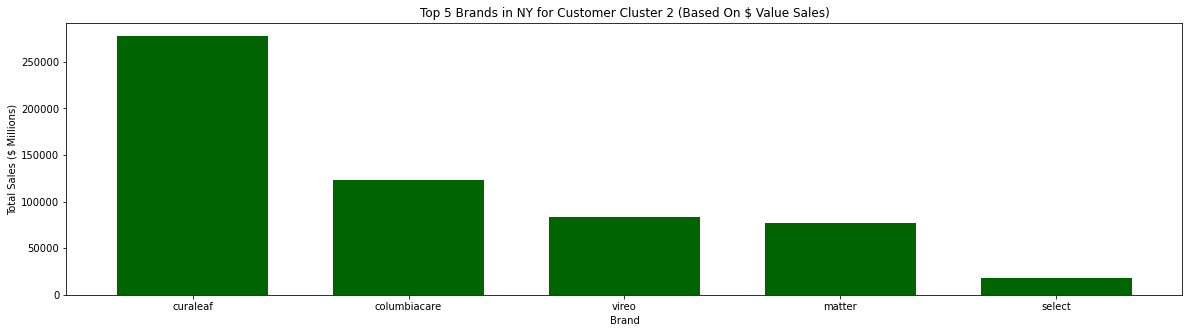

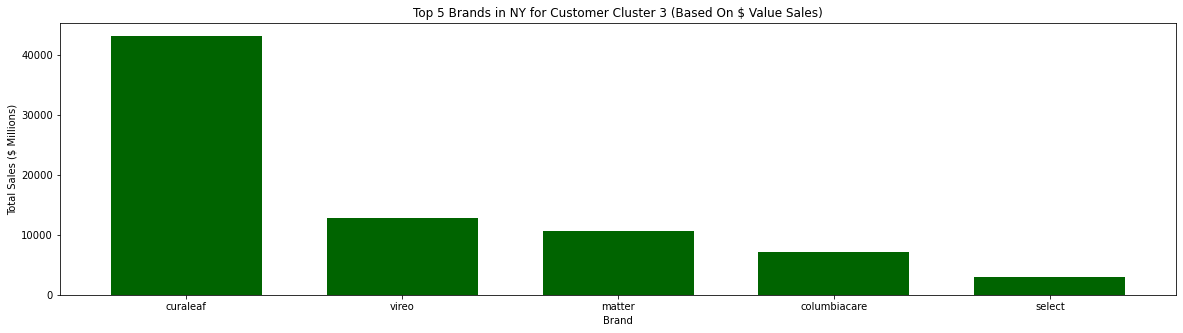

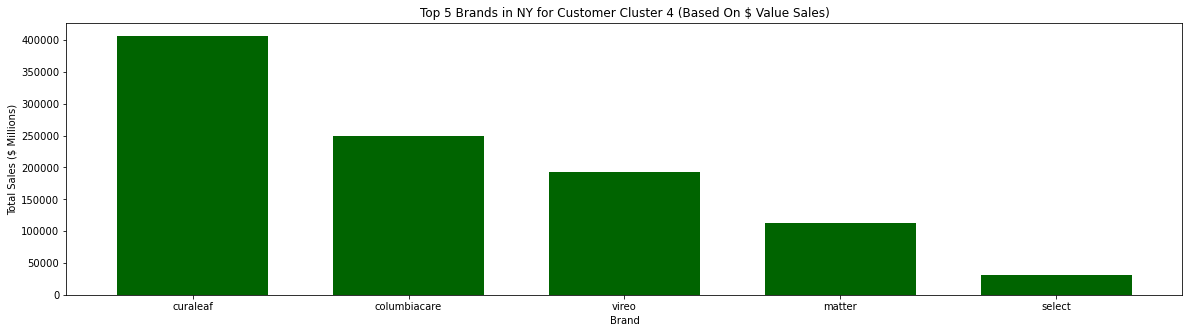

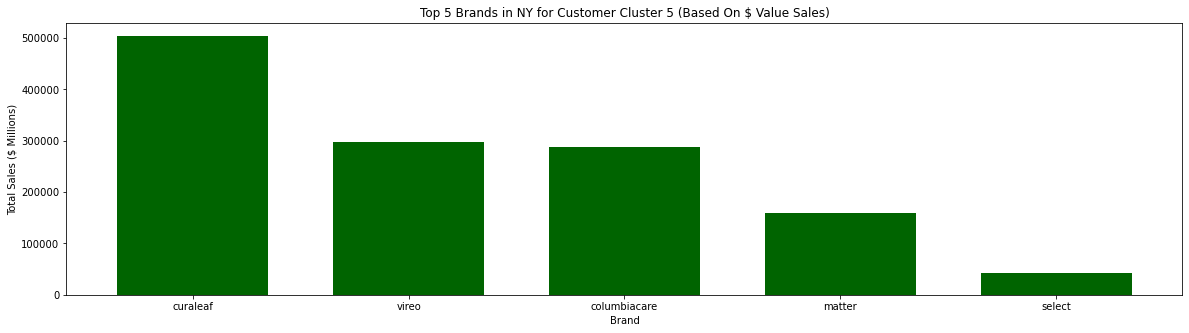

In [64]:
# creating a barplot for the top 5 brands
fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c0['brands'].index[:5], top_brand_metrics_c0['brands']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Brand')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Brands in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c0['brands']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c1['brands'].index[:5], top_brand_metrics_c1['brands']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Brand')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Brands in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c1['brands']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c2['brands'].index[:5], top_brand_metrics_c2['brands']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Brand')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Brands in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c2['brands']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c3['brands'].index[:5], top_brand_metrics_c3['brands']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Brand')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Brands in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c3['brands']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c4['brands'].index[:5], top_brand_metrics_c4['brands']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Brand')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Brands in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c4['brands']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c5['brands'].index[:5], top_brand_metrics_c5['brands']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Brand')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Brands in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c5['brands']['customer_cluster'][0]))
plt.show()

#### Product Categories

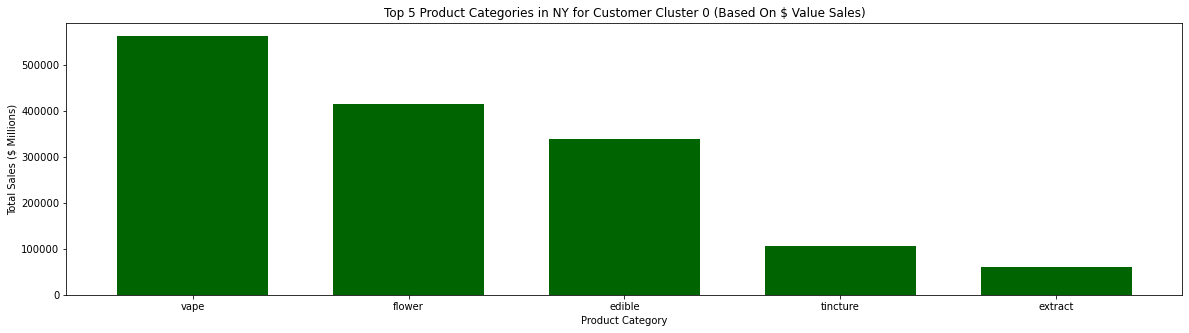

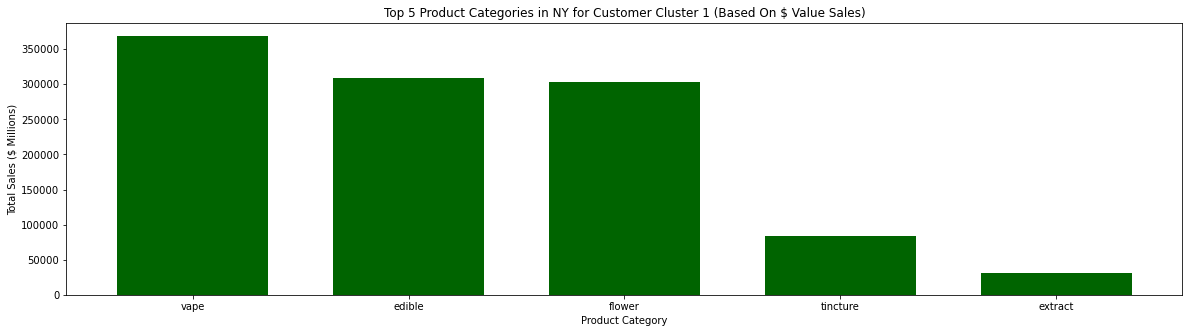

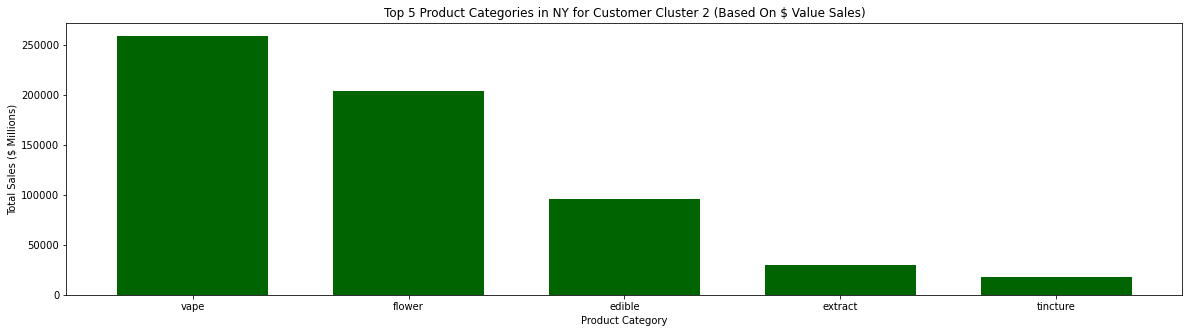

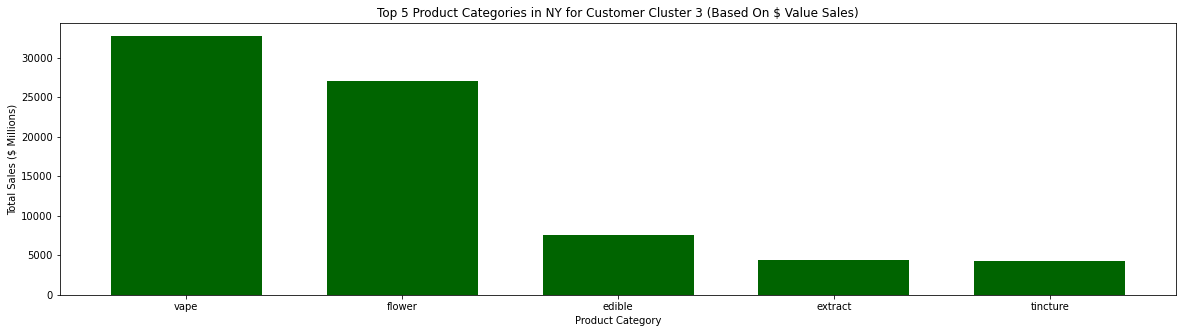

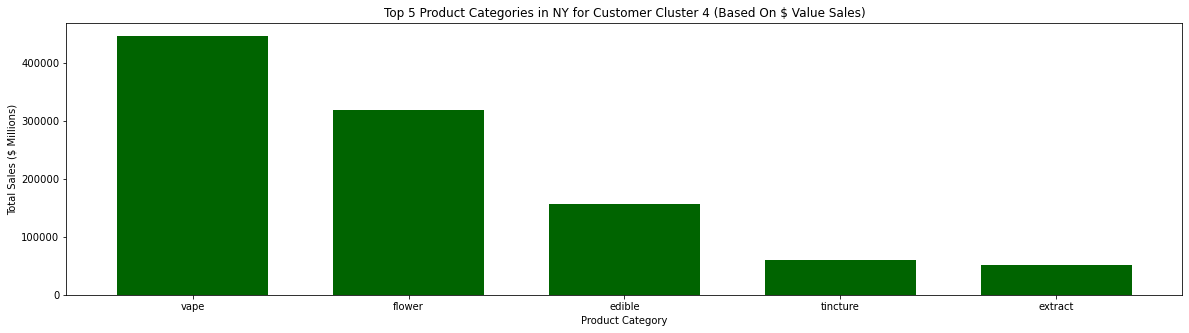

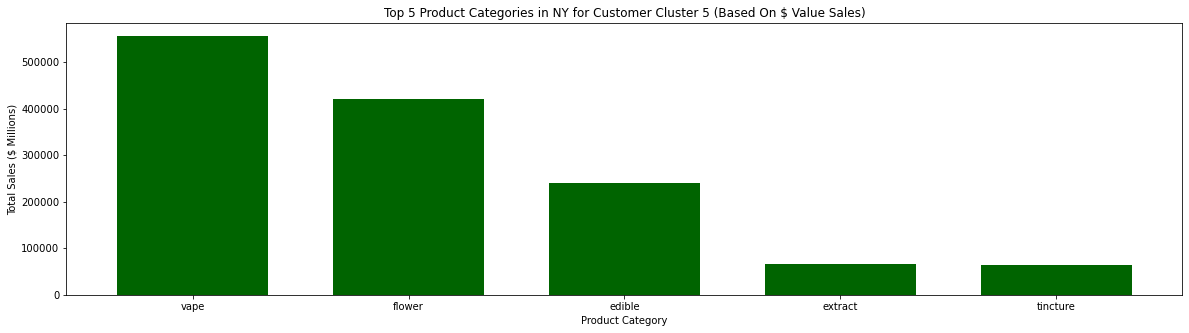

In [65]:
# creating a barplot for the top 5 product categories
fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c0['product_categories'].index[:5], top_brand_metrics_c0['product_categories']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Product Categories in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c0['product_categories']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c1['product_categories'].index[:5], top_brand_metrics_c1['product_categories']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Product Categories in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c1['product_categories']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c2['product_categories'].index[:5], top_brand_metrics_c2['product_categories']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Product Categories in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c2['product_categories']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c3['product_categories'].index[:5], top_brand_metrics_c3['product_categories']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Product Categories in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c3['product_categories']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c4['product_categories'].index[:5], top_brand_metrics_c4['product_categories']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Product Categories in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c4['product_categories']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c5['product_categories'].index[:5], top_brand_metrics_c5['product_categories']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Product Categories in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c5['product_categories']['customer_cluster'][0]))
plt.show()

#### Brand -- Product Category

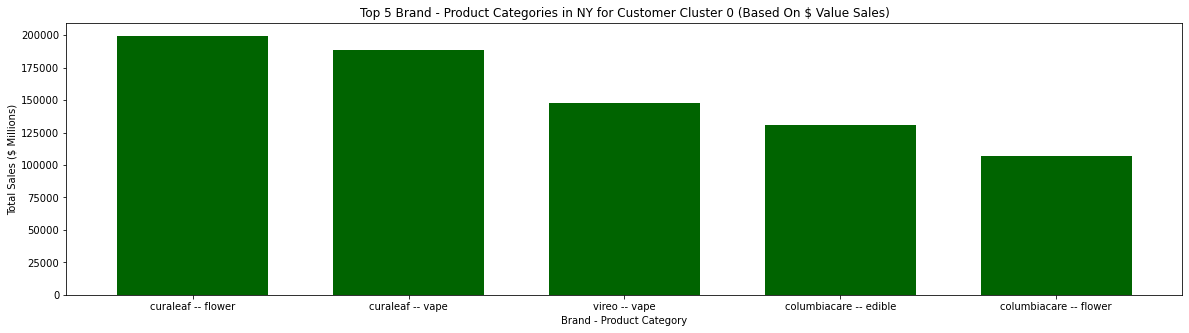

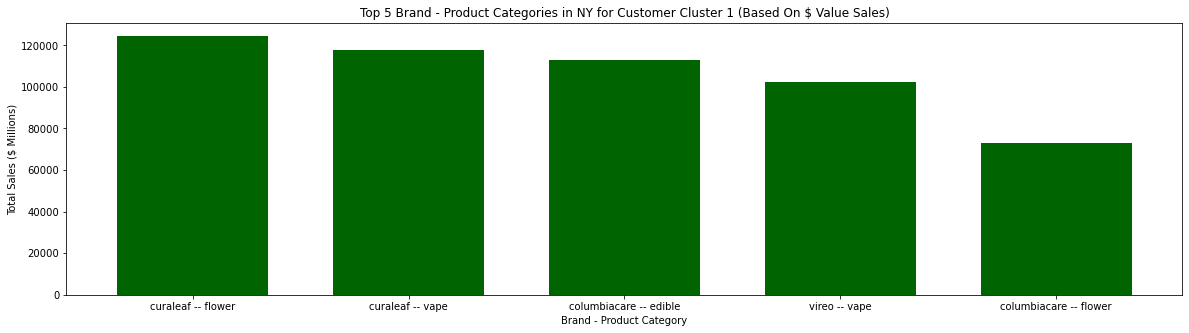

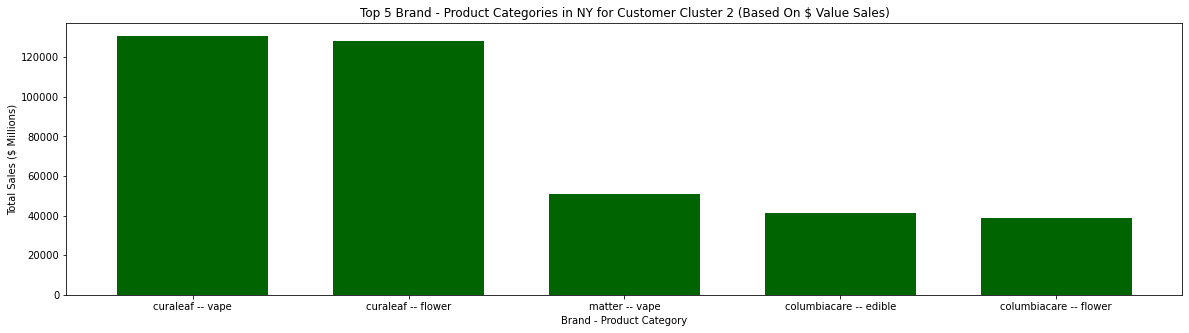

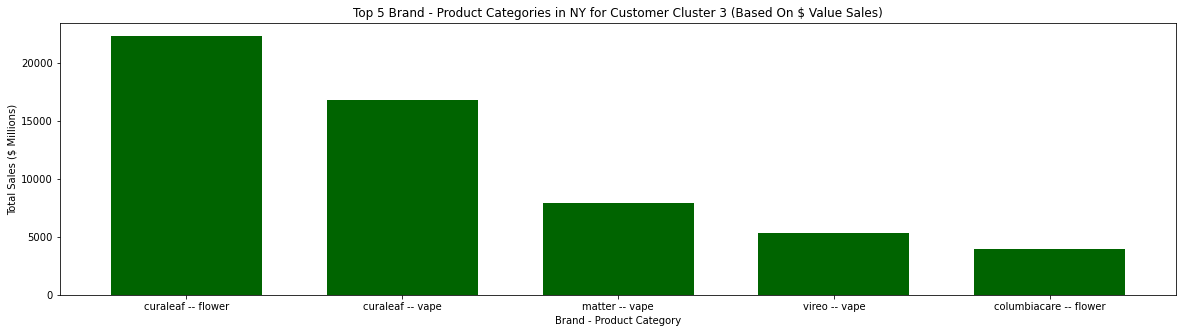

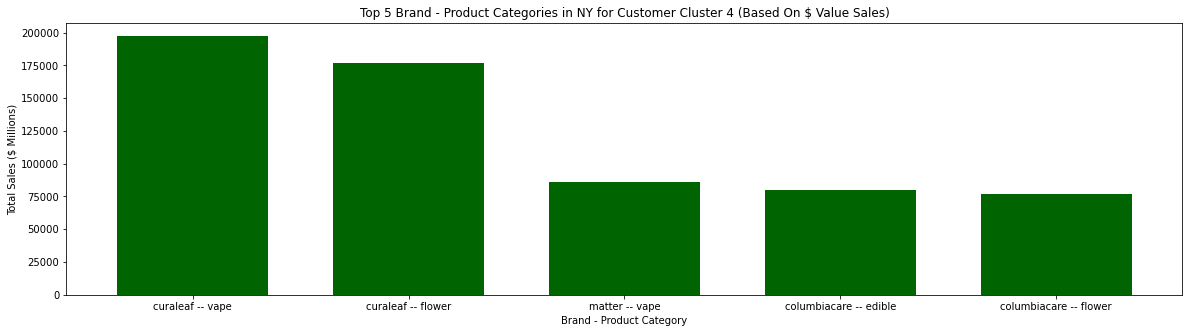

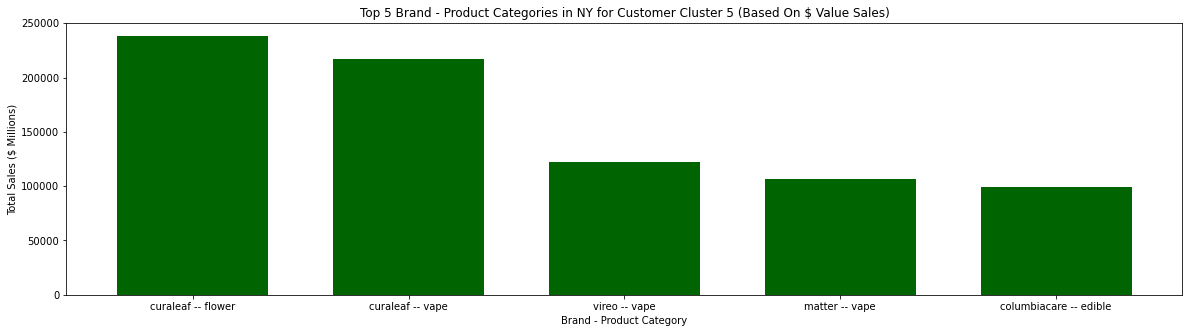

In [66]:
# creating a barplot for the top 5 brand product categories
fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c0['brand_product_categories'].index[:5], top_brand_metrics_c0['brand_product_categories']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Brand - Product Category')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Brand - Product Categories in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c0['brand_product_categories']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c1['brand_product_categories'].index[:5], top_brand_metrics_c1['brand_product_categories']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Brand - Product Category')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Brand - Product Categories in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c1['brand_product_categories']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c2['brand_product_categories'].index[:5], top_brand_metrics_c2['brand_product_categories']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Brand - Product Category')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Brand - Product Categories in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c2['brand_product_categories']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c3['brand_product_categories'].index[:5], top_brand_metrics_c3['brand_product_categories']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Brand - Product Category')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Brand - Product Categories in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c3['brand_product_categories']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c4['brand_product_categories'].index[:5], top_brand_metrics_c4['brand_product_categories']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Brand - Product Category')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Brand - Product Categories in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c4['brand_product_categories']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c5['brand_product_categories'].index[:5], top_brand_metrics_c5['brand_product_categories']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xlabel('Brand - Product Category')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Brand - Product Categories in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c5['brand_product_categories']['customer_cluster'][0]))
plt.show()

#### Products

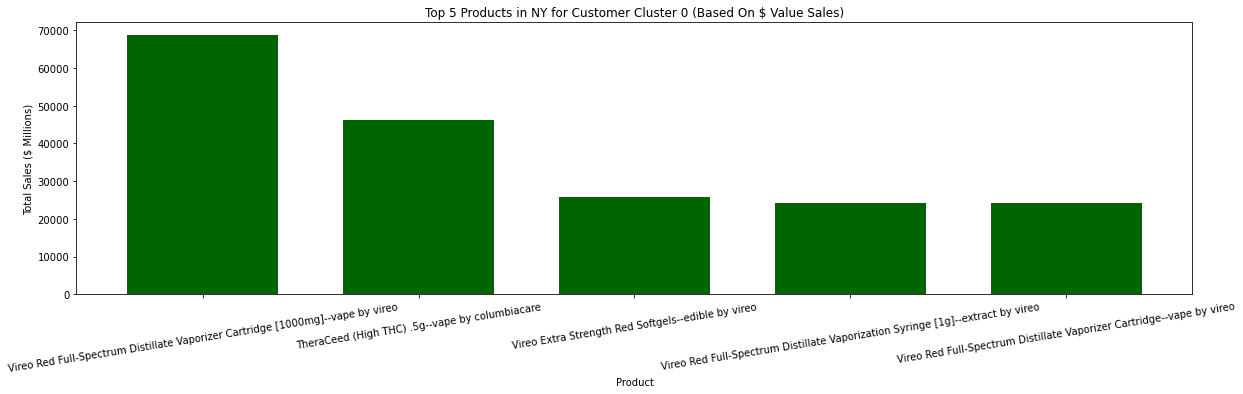

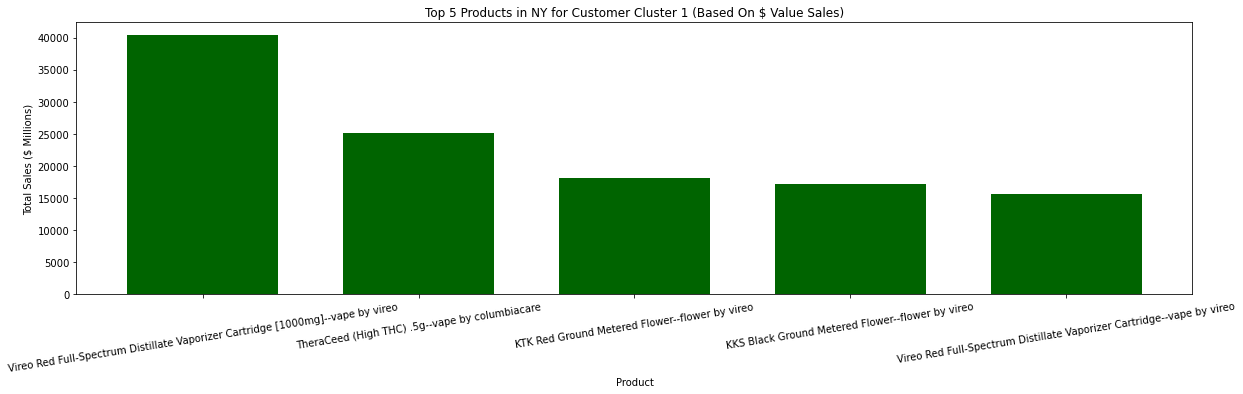

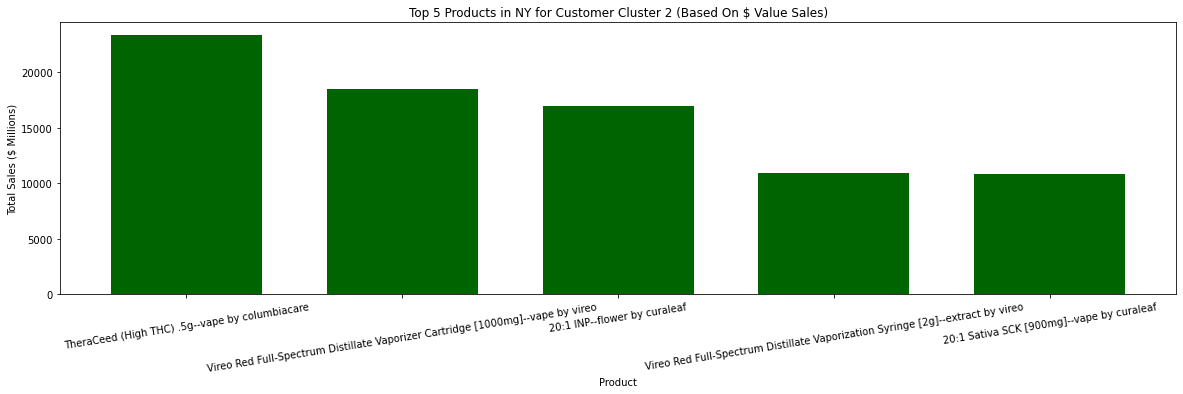

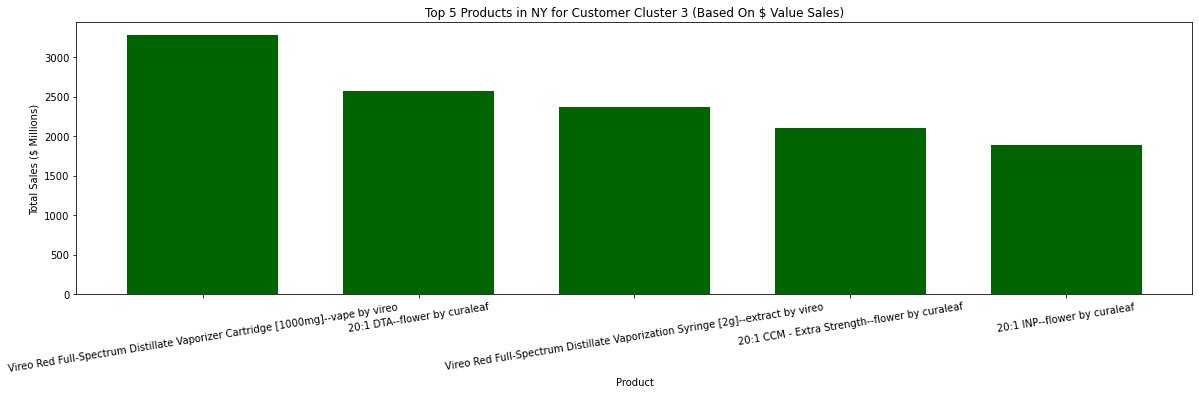

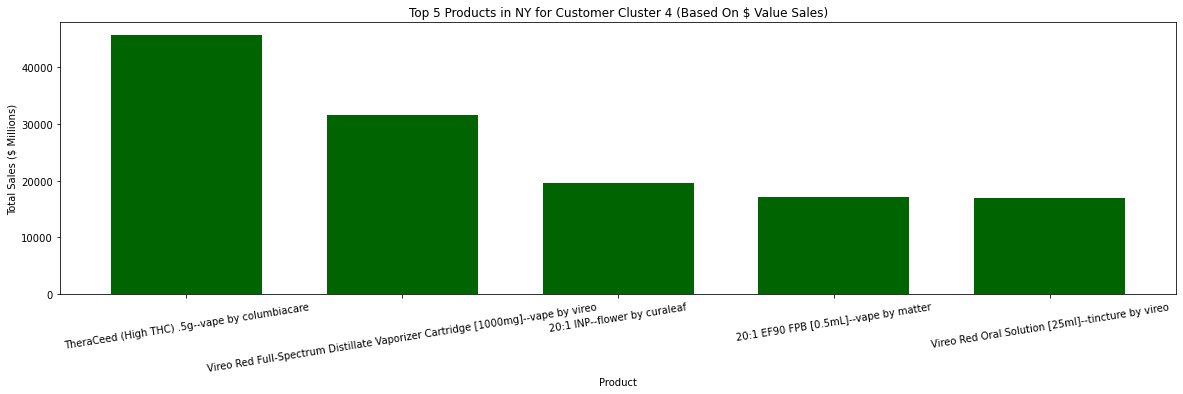

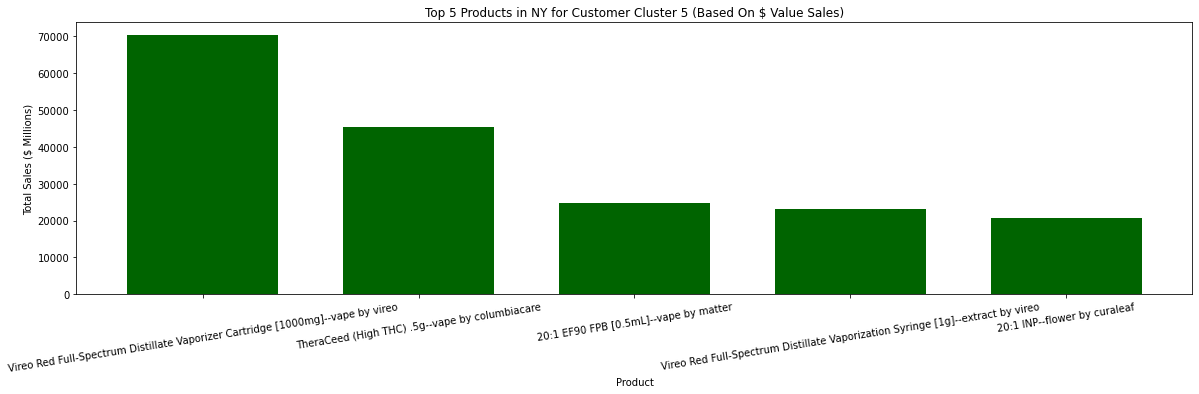

In [67]:
# creating a barplot for the top 5 products
fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c0['products'].index[:5], top_brand_metrics_c0['products']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xticks(rotation = 9)
plt.xlabel('Product')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Products in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c0['products']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c1['products'].index[:5], top_brand_metrics_c1['products']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xticks(rotation = 9)
plt.xlabel('Product')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Products in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c1['products']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c2['products'].index[:5], top_brand_metrics_c2['products']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xticks(rotation = 9)
plt.xlabel('Product')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Products in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c2['products']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c3['products'].index[:5], top_brand_metrics_c3['products']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xticks(rotation = 9)
plt.xlabel('Product')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Products in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c3['products']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c4['products'].index[:5], top_brand_metrics_c4['products']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xticks(rotation = 9)
plt.xlabel('Product')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Products in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c4['products']['customer_cluster'][0]))
plt.show()

fig = plt.figure(figsize = (20, 5))
plt.bar(top_brand_metrics_c5['products'].index[:5], top_brand_metrics_c5['products']['total_sales'][:5], color='darkgreen', width=0.7)
plt.xticks(rotation = 9)
plt.xlabel('Product')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 5 Products in NY for Customer Cluster {} (Based On $ Value Sales)'.format(top_brand_metrics_c5['products']['customer_cluster'][0]))
plt.show()

The graphs above indicate that the brands and product categories purchased were failry consistent across the customer clusters. However, the distinction came when analyzing the dropoff in market share between the items as the customer clusters changed. As can be seen from the graphs, there are steeper dropoffs between items purchased by clusters `2 - 5` when compraed to the dropoff between items purchased by clusters `0` and `1`.

### Purchase Frequency by Cluster

Lastly, DEV wanted to understand the customer frequency and usage by customer cluster. 

As previously discovered, most customers (~40 percent) made only 1 transaction on the platform during the analysis period. It was also seen that there were also groups of customers making 15-25 transactions during the analysis period. This indicates that there could be multiple segments of customers within the data set, and that these customers have different purchasing behavior.

So now, what does the behaviour look like per cluster?

In [68]:
def calculate_cluster_purchase_frequency(customer_cluster=1):
    
    cluster_df = ny_clusters[ny_clusters['customer_cluster']==customer_cluster]
    
    cluster_df['month_year'] = cluster_df['os__checkout_date'].dt.month.astype(str) + '-' + cluster_df['os__checkout_date'].dt.year.astype(str)
    cluster_df['month_year'] = cluster_df['month_year'].astype('datetime64[ns]')
    
    customer_transactions_per_month = cluster_df \
        .groupby(['month_year', 'os__user_id']) \
        .agg(
            number_of_transactions = pd.NamedAgg('os__cart_id', 'nunique')
        )
    customer_transactions_per_month.reset_index(inplace=True)
    
    avg_number_of_transactions_per_month = customer_transactions_per_month \
        .groupby('month_year') \
        .agg(
            avg_number_of_transactions = pd.NamedAgg('number_of_transactions', 'mean')
        ) \
        .sort_values('month_year', ascending=False)
    avg_number_of_transactions_per_month['customer_cluster'] = [customer_cluster] * len(avg_number_of_transactions_per_month)
    
    return avg_number_of_transactions_per_month

In [69]:
avg_transactions_per_month_c0 = calculate_cluster_purchase_frequency(0)
avg_transactions_per_month_c1 = calculate_cluster_purchase_frequency(1)
avg_transactions_per_month_c2 = calculate_cluster_purchase_frequency(2)
avg_transactions_per_month_c3 = calculate_cluster_purchase_frequency(3)
avg_transactions_per_month_c4 = calculate_cluster_purchase_frequency(4)
avg_transactions_per_month_c5 = calculate_cluster_purchase_frequency(5)

<ipython-input-68-6f1cc1e63898>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['month_year'] = cluster_df['os__checkout_date'].dt.month.astype(str) + '-' + cluster_df['os__checkout_date'].dt.year.astype(str)
<ipython-input-68-6f1cc1e63898>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['month_year'] = cluster_df['month_year'].astype('datetime64[ns]')
<ipython-input-68-6f1cc1e63898>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

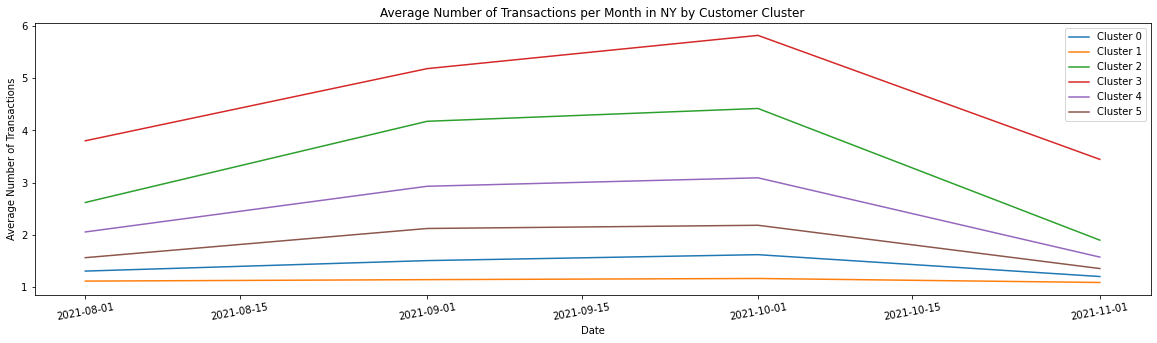

In [70]:
# graphing the average transactions per month by cluster
fig = plt.figure(figsize = (20, 5))
plt.plot(avg_transactions_per_month_c0.index, avg_transactions_per_month_c0.avg_number_of_transactions, label='Cluster 0')
plt.plot(avg_transactions_per_month_c1.index, avg_transactions_per_month_c1.avg_number_of_transactions, label='Cluster 1')
plt.plot(avg_transactions_per_month_c2.index, avg_transactions_per_month_c2.avg_number_of_transactions, label='Cluster 2')
plt.plot(avg_transactions_per_month_c3.index, avg_transactions_per_month_c3.avg_number_of_transactions, label='Cluster 3')
plt.plot(avg_transactions_per_month_c4.index, avg_transactions_per_month_c4.avg_number_of_transactions, label='Cluster 4')
plt.plot(avg_transactions_per_month_c5.index, avg_transactions_per_month_c5.avg_number_of_transactions, label='Cluster 5')
plt.xticks(rotation = 10)
plt.xlabel('Date')
plt.ylabel('Average Number of Transactions')
plt.title('Average Number of Transactions per Month in NY by Customer Cluster')
plt.legend()
plt.show()

Based on the graph of number of transactions per month by customer cluster, there are obvious differences in customer behaviour on the platform and between the clusters. `Customer cluster 3` represents DEV's ideal users -- these customers made at least 4 purchases per month on the platform during the analysis period. 

## Conclusion

Based on all of the analysis conducted, DEV was able to uncover multiple valuable insights. These insights could both be used to implement new strategies for DEV Marketplace, as well as to inform the direction for further analysis.

Firstly, DEV discovered that the rate of adoption of new customers in NY to DEV Marketplace was declining over time. Given that NY is a relatively new and seemingly exciting market, DEV expected to see an increasing (or at least constantly high) rate of adoption of new customers. Seeing that the metrics were contrary to DEV's expectations, it could signify that the individuals within NY are not yet fully accepting of cannabis or interested in participating within the (legal) cannabis market. Given this insight, DEV believes that more work should be done to appropriately estimate the the size of NY's total addressable market. 

With this in mind, DEV believes that it should focus on retention and and increasing the usage metrics on the platform -- if individuals are not interested in cannabis, it would be very difficult to get them to start consuming cannabis. Rather, DEV should (initially) focus on retaining the users that they currently have. 

Therefore, DEV investigated customer frequency and usage on the platform. In an ideal world, DEV has multiple users making many transactions on the platform. However, the metrics were again contrary to DEV's expectations. From the usage analysis, DEV found that the majority of users only made 1 transaction on the platform (over the analysis period). Although the portion of customers making multiple transactions was significantly lower than the portion of customers making single transactions, there were individuals making 15 - 25 transactions over the period.

When analyzing transactions, DEV uncovered top brands and products, as well as association rules for brands and products within a customer’s basket. It was found that the average basket size is ~183 dollars; customers typically have ~3 distinct items in the basket from 1 - 2 brands and product categories. This insight was particularly useful for the basket analysis, because it showed that customers frequently bought multiple items (or that they purchase items together). Unsurprisingly, the more granular basket analyses uncovered that customers typically purchase the same product category together in a transaction.

For the customer segmentation, DEV identified 6 distinct groups of customers. Each group had its own range of values for which customers spend on products, and maximum number of units that customers purchase. DEV identified that they could create special incentives for these groups, such as DEV Gold or DEV VIP memberships. DEV also attempted to demographically profile the customer segments; however, there were no distinct differences between the clusters. DEV also attempted to identify the preferences between clusters, and no strong preferences were discovered. However, the distinction came when analyzing the dropoff in market share between the items as the customer clusters changed. As can be seen from the graphs, there are steeper dropoffs between items purchased by clusters `2 - 5` when compraed to the dropoff between items purchased by clusters `0` and `1`.

Lastly, DEV attempted to create demand forecasts to understand what types of items will be heavily demanded in NY within the near future, but this attempt was unsuccessful. 

## Recommendations and Next Steps

A next steps, DEV intends on: 

- Implementing a feature on DEV Marketplace which lets customers know what brands and products are typically purchased together. This feature will focus more on brands which are not top brands since DEV believes that this will assist in product discovery.
- Conducting basket analyses on the various customer segments. DEV acknowledges that the various segments might have varied product preferences; therefore, making the recommendations more granular and personalized could increase stickiness on the platform.
- Extracting a longer time series such that demand forecasting can be appropriately investigated.